## ADVANCED REGRESSION MODEL ---> PREDICTION OF HOUSE PRICES

In [1]:
#Loading basic packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Nice plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("magma", n_colors=10))

#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

#Several outputs in the same code cell
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#Ignore annoying warning (from sklearn and seaborn)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

#Setting a seed for random steps
np.random.seed(0) 


### IMPORTING DATA 

#### URLs in Github account for download the train and test sets

In [11]:
url_train="https://raw.githubusercontent.com/ArantxaData/ML_Advanced-Regression-models_House-Prices/main/train.csv"
url_test="https://raw.githubusercontent.com/ArantxaData/ML_Advanced-Regression-models_House-Prices/main/test.csv"

#### Importing CSV files

In [12]:
import requests
import io

download_train = requests.get(url_train).content
download_test = requests.get(url_test).content

data_train=pd.read_csv(io.StringIO(download_train.decode('utf-8')))
data_test=pd.read_csv(io.StringIO(download_test.decode('utf-8')))

#### Checking the number of rows and features in dataset (in this case it is a small dataset)

In [13]:
data_train.head()
print('The number of training examples is:{}'.format(data_train.shape[0]))
print('The number of features are:{}'.format(data_train.shape[1]))
print('The number of test examples are:{}'.format(data_test.shape[0]))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The number of training examples is:1460
The number of features are:81
The number of test examples are:1459


#### First 'quick' statistics

In [14]:
#There are 37 numerical features, many of them with outliers.

data_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000,1460.000,1201.000,1460.000,1460.000,1460.000,1460.000,1460.000,1452.000,1460.000,...,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000,1460.000
mean,730.500,56.897,70.050,10516.828,6.099,5.575,1971.268,1984.866,103.685,443.640,...,94.245,46.660,21.954,3.410,15.061,2.759,43.489,6.322,2007.816,180921.196
std,421.610,42.301,24.285,9981.265,1.383,1.113,30.203,20.645,181.066,456.098,...,125.339,66.256,61.119,29.317,55.757,40.177,496.123,2.704,1.328,79442.503
min,1.000,20.000,21.000,1300.000,1.000,1.000,1872.000,1950.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,365.750,20.000,59.000,7553.500,5.000,5.000,1954.000,1967.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,129975.000
50%,730.500,50.000,69.000,9478.500,6.000,5.000,1973.000,1994.000,0.000,383.500,...,0.000,25.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163000.000
75%,1095.250,70.000,80.000,11601.500,7.000,6.000,2000.000,2004.000,166.000,712.250,...,168.000,68.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,214000.000
max,1460.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,...,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


<font size="2">Test set in this exercise has no target, so we cannot use it as a testing set. It has been defined for prediction purposes,
but no for testing, as we don´t know the real value of target for those row. For this exercise, we only want to compare the
behaviour of different regression models with the same dataset as input, so we are not focusing on aspects as Data Linkage. Moreover, the train dataset has a small size, so will use cross-validation for validating despite we know we are incurring in linkage in this case. If we would want to skip Data Leakage we should split the train dataset into train and a test set (this time with a target value).</font>

### EDA AND PREPROCESSING

#### NO NECESSARY FEATURES

We don´t need 'Id' column, neither 'Utilities' as it is clearly unbalanced and has not useful information.

In [15]:
data_train['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

#### Dropping 'Id' and 'Utilities'

In [16]:
train_Id=data_train['Id']
data_train=data_train.drop(['Id','Utilities'], axis=1)
data_test=data_test.drop(['Id','Utilities'], axis=1)

Note: Along the exercise, we will use custom functions to define some repetitive tasks.

#### MISSING VALUES

In [6]:
#Custom function for exploring missing values in a dataframe.

def explore_missing(data):
    
    ''' 
    This function takes as argument a dataframe and prints the name of the features with missing values and
    plots then in order of descending missing values, also returns a dataframe with the percent of missing values.
    
    Input:  data (a dataframe)
    
    Output: Plots in descending order features with missing values in the input dataframe.
    
    '''

    data_missing=data.columns[data.isna().sum()!=0]
    percent_miss=data[data_missing].isna().mean()*100
    miss_data=pd.DataFrame(percent_miss.sort_values(ascending=False), columns=['Missing_Ratio'])

    #Plotting the missing ratio

    plt.subplots(figsize=(10,6))
    plt.xticks(rotation='90')
    plt.title('Percent of missing values in Features')
    sns.barplot(x=miss_data.index,y=miss_data['Missing_Ratio']);
    return miss_data


There are 5 features with almost all values as 'NaN'; nevertheless the project documentation explains that
for some features a 'NaN' value does not mean the information is missing, but the house does not have a facility. 
So, we will use 'None' value for these categorical variables, and a '0' value for the numerical ones with these requirements. 

#### Missing values in TRAIN SET Plot

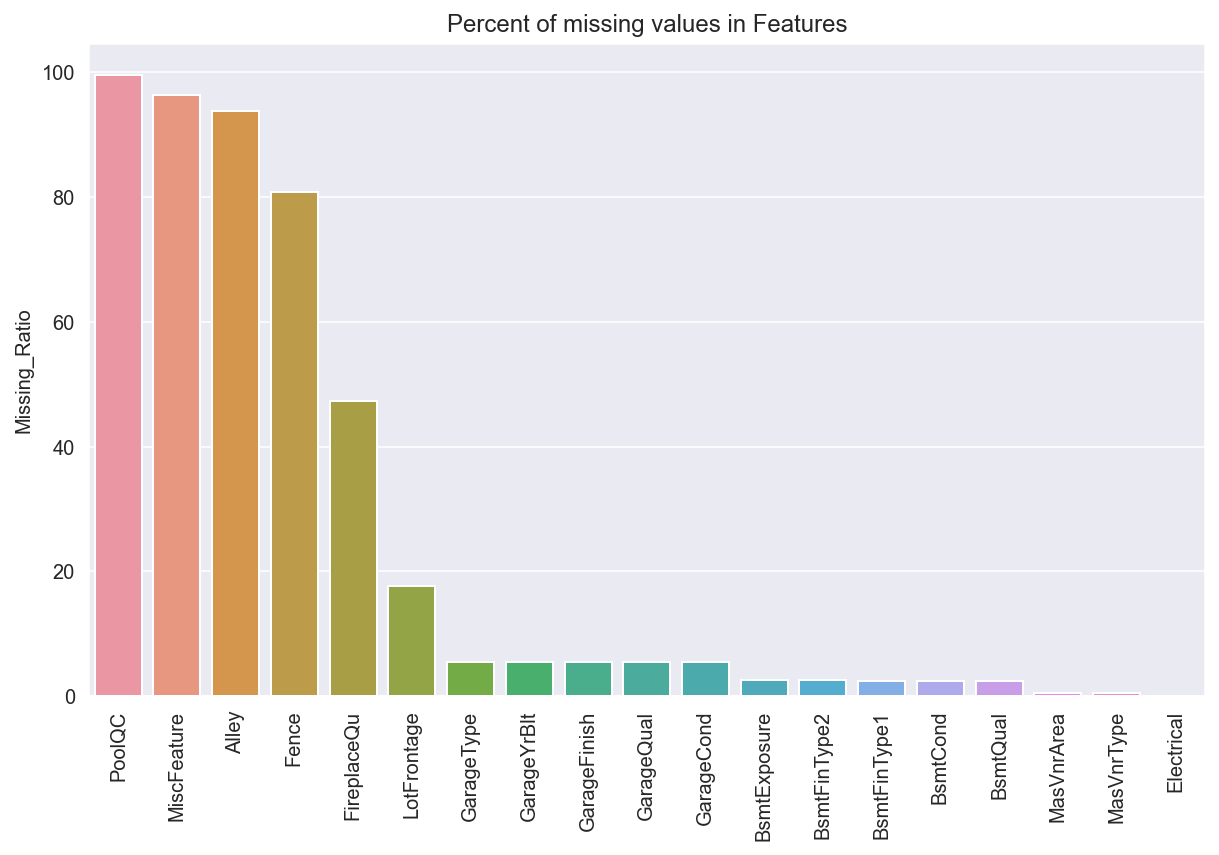

In [9]:
train_missing=explore_missing(data_train)

There are some additional variables with missing values in test set than have no missing values in train set. We have to consider the imputation also for these features. These variables are: 'MSZoning', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType' and 'KitchenQual'

#### Missing values in TEST SET Plot

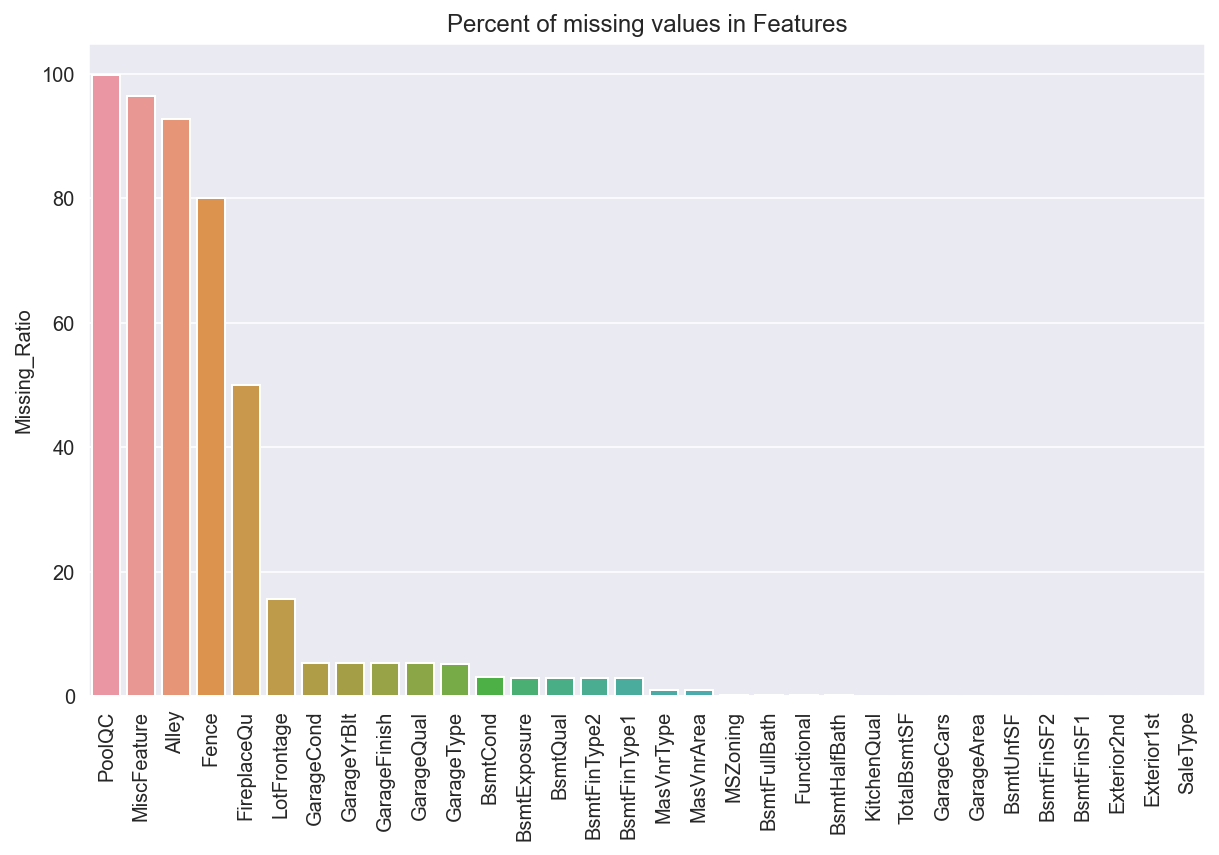

In [10]:
test_missing=explore_missing(data_test)

In [11]:
#Features with missing values in test set but not in train set.

[item for item in test_missing.index if item not in train_missing.index]

['MSZoning',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'Exterior2nd',
 'Exterior1st',
 'SaleType',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'KitchenQual',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF']

#### Missing values in specific features

Let´s explore some particular features in train set as 'LotFrontage'. We will define a custom function to find the correlation between this numerical feature and the rest of features in dataset. We find that best correlated feature with this one is '1stFlrSF'.

The best correlation for LotFrontage is : 1stFlrSF with 0.457


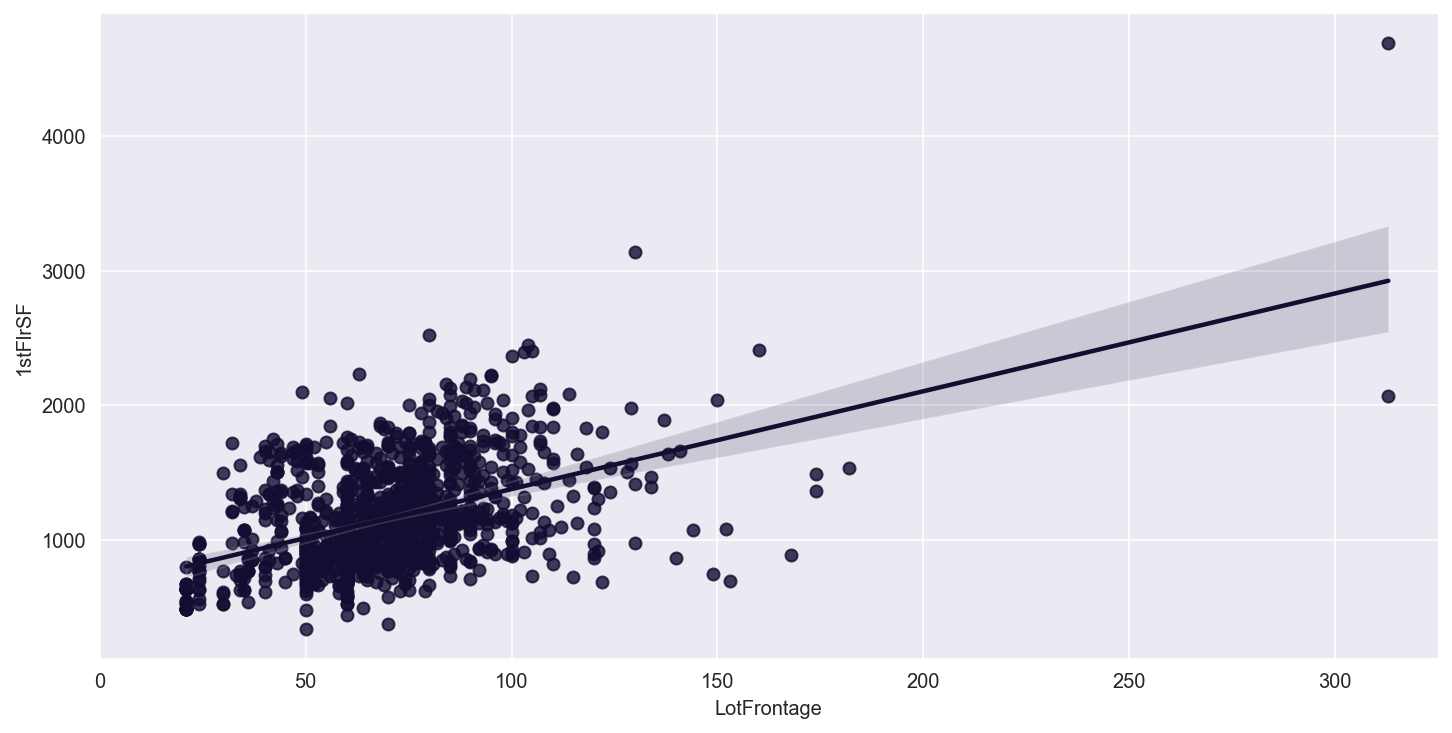

In [6]:
#Custom function to find Best correlation between numerical features: 

def best_num_corr(data, feature):
    
    ''' 
    This function takes as argument a dataframe and a numerical feature of the dataframe;
    and returns the name of the numeric feature in the dataframe that best correlates with the specified feature.
        
    Input:  data (a dataframe)
            feature (the variable or column in the dataframe for which we want to know the best correlation)
    
    Output: Print the name an value of the feature that best correlates with the input feature)
    
    '''
    numerical=data.select_dtypes(exclude='object')
    best_corr_name=numerical.corr()[numerical.corr()[feature]<1][feature].idxmax()
    best_corr_value=numerical.corr()[numerical.corr()[feature]<1][feature].max()

    sns.lmplot(x=feature,y=best_corr_name, data=data, height=5, aspect=2)
    plt.xlim(0,325);
    
    print('The best correlation for {} is : {} with {:.3f}'. format(feature, best_corr_name, best_corr_value))

best_num_corr(data_train, 'LotFrontage')

We will use ANOVA one-way method to study the correlation between a numerical and a categorical feature. If null hypothesis is rejected (H0 == 'Feature are no correlated) then both features are suposed to be correlated. This occurs when p-value es lower than 0.05. Best correlated categorical feature is 'BldgType'.

In [5]:
#Function to find Best correlation between a numerical and categorical features: 


def best_cat_corr(data, feature):

    ''' 
    This function takes as argument a dataframe and a numerical feature of the dataframe;
    and returns the name of the categorical feature in the dataframe that best correlates with the specified feature.
        
    Input: data (a dataframe)
           feature (the variable or column in the dataframe for which we want to know the best correlation)
    
    Output: print the name of the variable and p-value that best correlates with the input feature)
    
    '''
    from scipy.stats import f_oneway
    categorical=data.select_dtypes('object')
    best_corr_value=100
    
    for i in categorical.columns:
        
        data_feature=data[[i,feature]].dropna()
        category_groups=data_feature.groupby([i])[feature].apply(list)
        
        anova_result=f_oneway(*category_groups)[1]
        
        if anova_result<best_corr_value:
            best_corr_value=anova_result
            best_corr_name=i
   
    #plt.figure(figsize = (12,6))
    #g=sns.boxplot(x=best_corr_name,y=feature, data=data)
    
    print('The best correlation for {} is : {} with {}'. format(feature, best_corr_name, best_corr_value)) 
    return best_corr_name
    
best_cat_corr(data_train, 'LotFrontage')

The best correlation for LotFrontage is : BldgType with 2.389898748978942e-72


'BldgType'

Correlation between numerical features with 'LotFrontage' is not as high as expected, so we decide to impute the missing values for this variable with 'BldgType'. As this feature has many outliers, we will use the median() method instead of mean().

In [6]:
#Percent of missing data for 'LotFrontage' and missing data when grouped by 'BldgType':

print('The percent of missing data in LotFrontage is: {:.3f}\n'.format(data_train['LotFrontage'].isna().mean()*100))
print('The percent of missing data in LotFrontage by BldgType class is: \n\n{}'.format(data_train.groupby('BldgType')['LotFrontage'].apply(lambda x: x.isna().mean()*100)))

The percent of missing data in LotFrontage is: 17.740

The percent of missing data in LotFrontage by BldgType class is: 

BldgType
1Fam     18.525
2fmCon    9.677
Duplex    9.615
Twnhs     6.977
TwnhsE   19.298
Name: LotFrontage, dtype: float64


#### Exploring Missing values in the rest of features

We will define a custom function to summarize the number of missing values in train and test sets features. As we can see, the number of missing values is very low, so we will impute them with the 'mode' method.

In [12]:
#Custom function to explore the missing values in a feature (pd.Series)

def explore_feature(categorical_series):
    
    ''' 
    This function takes as argument a pd.Series categorical feature and prints out the total missing values; and
    the missing values per category
    
    Input:  pd.Series (a feature)
    
    Output: Total number of missing values, and missing values per category
    
    '''

    print('Missing values in feature: {}\n'.format(categorical_series.isna().sum()))
    print('Number of values per feature category:\n{}'.format(categorical_series.value_counts()))

In [13]:
#Exploring Electrical in train set: 

explore_feature(data_train['Electrical'])


Missing values in feature: 1

Number of values per feature category:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [14]:
#Exploring MSZoning in test set: 

explore_feature(data_test['MSZoning'])

Missing values in feature: 4

Number of values per feature category:
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64


In [15]:
#Exploring Functional in test set: 

explore_feature(data_test['Functional'])

Missing values in feature: 2

Number of values per feature category:
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64


In [16]:
#Exploring Exterior2nd in test set: 

explore_feature(data_test['Exterior2nd'])

Missing values in feature: 1

Number of values per feature category:
VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64


In [17]:
#Exploring Exterior1st in test set: 

explore_feature(data_test['Exterior1st'])

Missing values in feature: 1

Number of values per feature category:
VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64


In [18]:
#Exploring SaleType in test set: 

explore_feature(data_test['SaleType'])

Missing values in feature: 1

Number of values per feature category:
WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
Con         3
ConLw       3
Name: SaleType, dtype: int64


In [19]:
#Exploring KitchenQual in test set: 

explore_feature(data_test['KitchenQual'])

Missing values in feature: 1

Number of values per feature category:
TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64


#### Missing values summarize and final custom function to replace 'NaN' in dataset

There are features with no-real missing values. In these cases we will replace the 'NaN' value by 'None' or '0' for categorical and numerical features respectively. The rest of missing values will be replaced by the 'mode' of the feature, with the exception of 'LotFrontage' that will be replaced with the 'median' value for the feature grouped by 'BldgType'.

In [17]:
#Custom function to fill the missing values with the previous requirements observed.

def MissingFill(data):
    
    ''' 
    This function takes as argument a dataframe with original features and outputs the same
    dataframe with missing values filled.
        
    Input: data (a dataframe with missing values)
    Output: data (filled dataframe)
    
    '''
    #Replacing some categorical columns with 'None' value
    
    for col in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu', 'GarageType','GarageFinish','GarageQual','GarageCond',
                'BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType']:
        
                data[col]=data[col].fillna('None')
    
    #Replacing some numerical columns with 0 value
    
    for col in ['GarageYrBlt','GarageCars','GarageArea','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
                'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'MasVnrArea']:
        
                data[col]=data[col].fillna(0)
    

    #LotFrontage: We consider the median value of LotFrontage grouping by BldgType.

    data["LotFrontage"] = data.groupby("BldgType")["LotFrontage"].apply(lambda x: x.fillna(x.median()))
    
    #Features to replace with the mode value
    
    for col in ['Electrical','MSZoning','Functional','Exterior2nd','Exterior1st','SaleType', 'KitchenQual']:
    
        data[col] = data[col].fillna(data[col].mode()[0])
    
    return data

data_train=MissingFill(data_train)
data_test=MissingFill(data_test)

#### Checking Imputation of 'NaN' values

Let´s check that we don´t have any missing value and our dataset has no duplicated data after the imputation.

In [18]:
data_train.columns[data_train.isnull().any()]
data_test.columns[data_test.isnull().any()]

Index([], dtype='object')

Index([], dtype='object')

#### DUPLICATED VALUES

In [9]:
#We have no duplicates this time.

data_train.duplicated().sum()
data_test.duplicated().sum()

0

0

#### ERRORS IN INPUT DATA

We have to check also for errors in input data. These errors can be different features types in train and test sets. We will define a custom function to check it.

In [10]:
#Custom function to check ERRORS IN DATA

def split_for_test_errors(data):
    
    ''' 
    This function takes as argument a dataframe and divides it into three dataframes with different feature types:
    -'int64'
    -'float'
    -'object'
        
    Input:  data (a dataframe)
    Output: 3 dataframes (dataframe with 'int' feature, 'float' features and 'object' features)
            outputs the unique values of each class in cualitative features.
    
    '''
    
    int_=data.select_dtypes('int64')
    float_=data.select_dtypes('float')
    object_=data.select_dtypes('object')
    
    return int_,float_,object_

In [13]:
#Splitting train and test sets for checking for errors: 

train_int, train_float, train_object=split_for_test_errors(data_train)
test_int, test_float, test_object=split_for_test_errors(data_test)

In [14]:
#Train_float and test_float have different number of features of each type. Let´s check it:

assert train_float.shape[1]==test_float.shape[1], 'Shapes don´t match'

AssertionError: Shapes don´t match

The train and test datasets have different types for some of the 'float' features. We have to change those variables to the correct type. For doing so, we will use a custom function that maps the features in train and test set to the correct type.

In [19]:
#Custom function for defining the correct type of each feature for the dataset.

def map_types(data):
    
    ''' 
    This function takes as argument a dataframe and change the type of the features to the correct type.
    -'int64'
    -'float'
    -'object'
        
    Input:  data (a dataframe)
    Output: data (dataframe with the correct feature type)
    
    '''
    
    numerical=['LotFrontage', 'LotArea',  'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 
               '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'GarageArea', 'WoodDeckSF',
               'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']

    nominal=  ['MSSubClass']

    ordinal=  ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','BedroomAbvGr', 
               'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces','GarageCars','YearBuilt', 'YearRemodAdd','MoSold', 
               'GarageYrBlt','YrSold']

    
    
    for col in data.columns:
        
        if col in ordinal:
            data[col]=data[col].astype('int64')
        elif col in numerical:
            data[col]=data[col].astype('float')
        elif col in nominal:
            data[col]=data[col].astype('object')
        else:
            pass
        
    return data

In [20]:
#Mapping the features in train and test set to the correct type:

data_train=map_types(data_train)
data_test=map_types(data_test)

#### OUTLIERS

Now, we will focus on outliers. Outliers are data out of range, so we will use ZScore to check data points that are far away from the standard deviation value. We define a threshold of 3 for that.

In [13]:
#Custom function to detect the number of outliers in each numerical feature of a dataset.

def num_outliers(data):
    
    from scipy import stats
    ''' 
    This function takes as argument a dataframe, selects the subset of numerical features and detects the number of 
    univariate outliers with a threshold value of 3 from STD.
        
    Input:  data (a dataframe)
    Output: Number of univariate outliers in each numerical feature
    
    '''
    numerical=data.select_dtypes(exclude='object')
    threshold=3
    
    ZScore=np.abs(numerical.apply((stats.zscore)))
    ZScore=ZScore[ZScore>threshold]
    return ZScore.count().sort_values(ascending=False)

In [14]:
#Identifying outliers in numerical features of train set : We have several features with outliers

num_outliers(data_train)

BsmtHalfBath     82
GarageYrBlt      81
KitchenAbvGr     68
ScreenPorch      55
EnclosedPorch    51
BsmtFinSF2       50
MasVnrArea       32
OverallCond      28
OpenPorchSF      27
3SsnPorch        23
SalePrice        22
WoodDeckSF       22
LowQualFinSF     20
BsmtFullBath     16
LotFrontage      16
GrLivArea        16
BedroomAbvGr     14
LotArea          13
1stFlrSF         12
TotRmsAbvGrd     12
HalfBath         12
BsmtUnfSF        11
TotalBsmtSF      10
MiscVal           8
PoolArea          7
GarageArea        7
BsmtFinSF1        6
YearBuilt         6
Fireplaces        5
2ndFlrSF          4
OverallQual       2
FullBath          0
GarageCars        0
YearRemodAdd      0
MoSold            0
YrSold            0
dtype: int64

There are some outliers affecting the correlation with target. In these situations, we should develop and run an analysis
with and without them and compare results, it is not a good practice just to drop them unless they are extreme outliers.
For this exercise, we will drop some extreme values and will see how robust models deal better with this kind of data.
Extreme values to drop are some data in 'LotFrontage' and 'LotArea' features as we can see in the plot below.

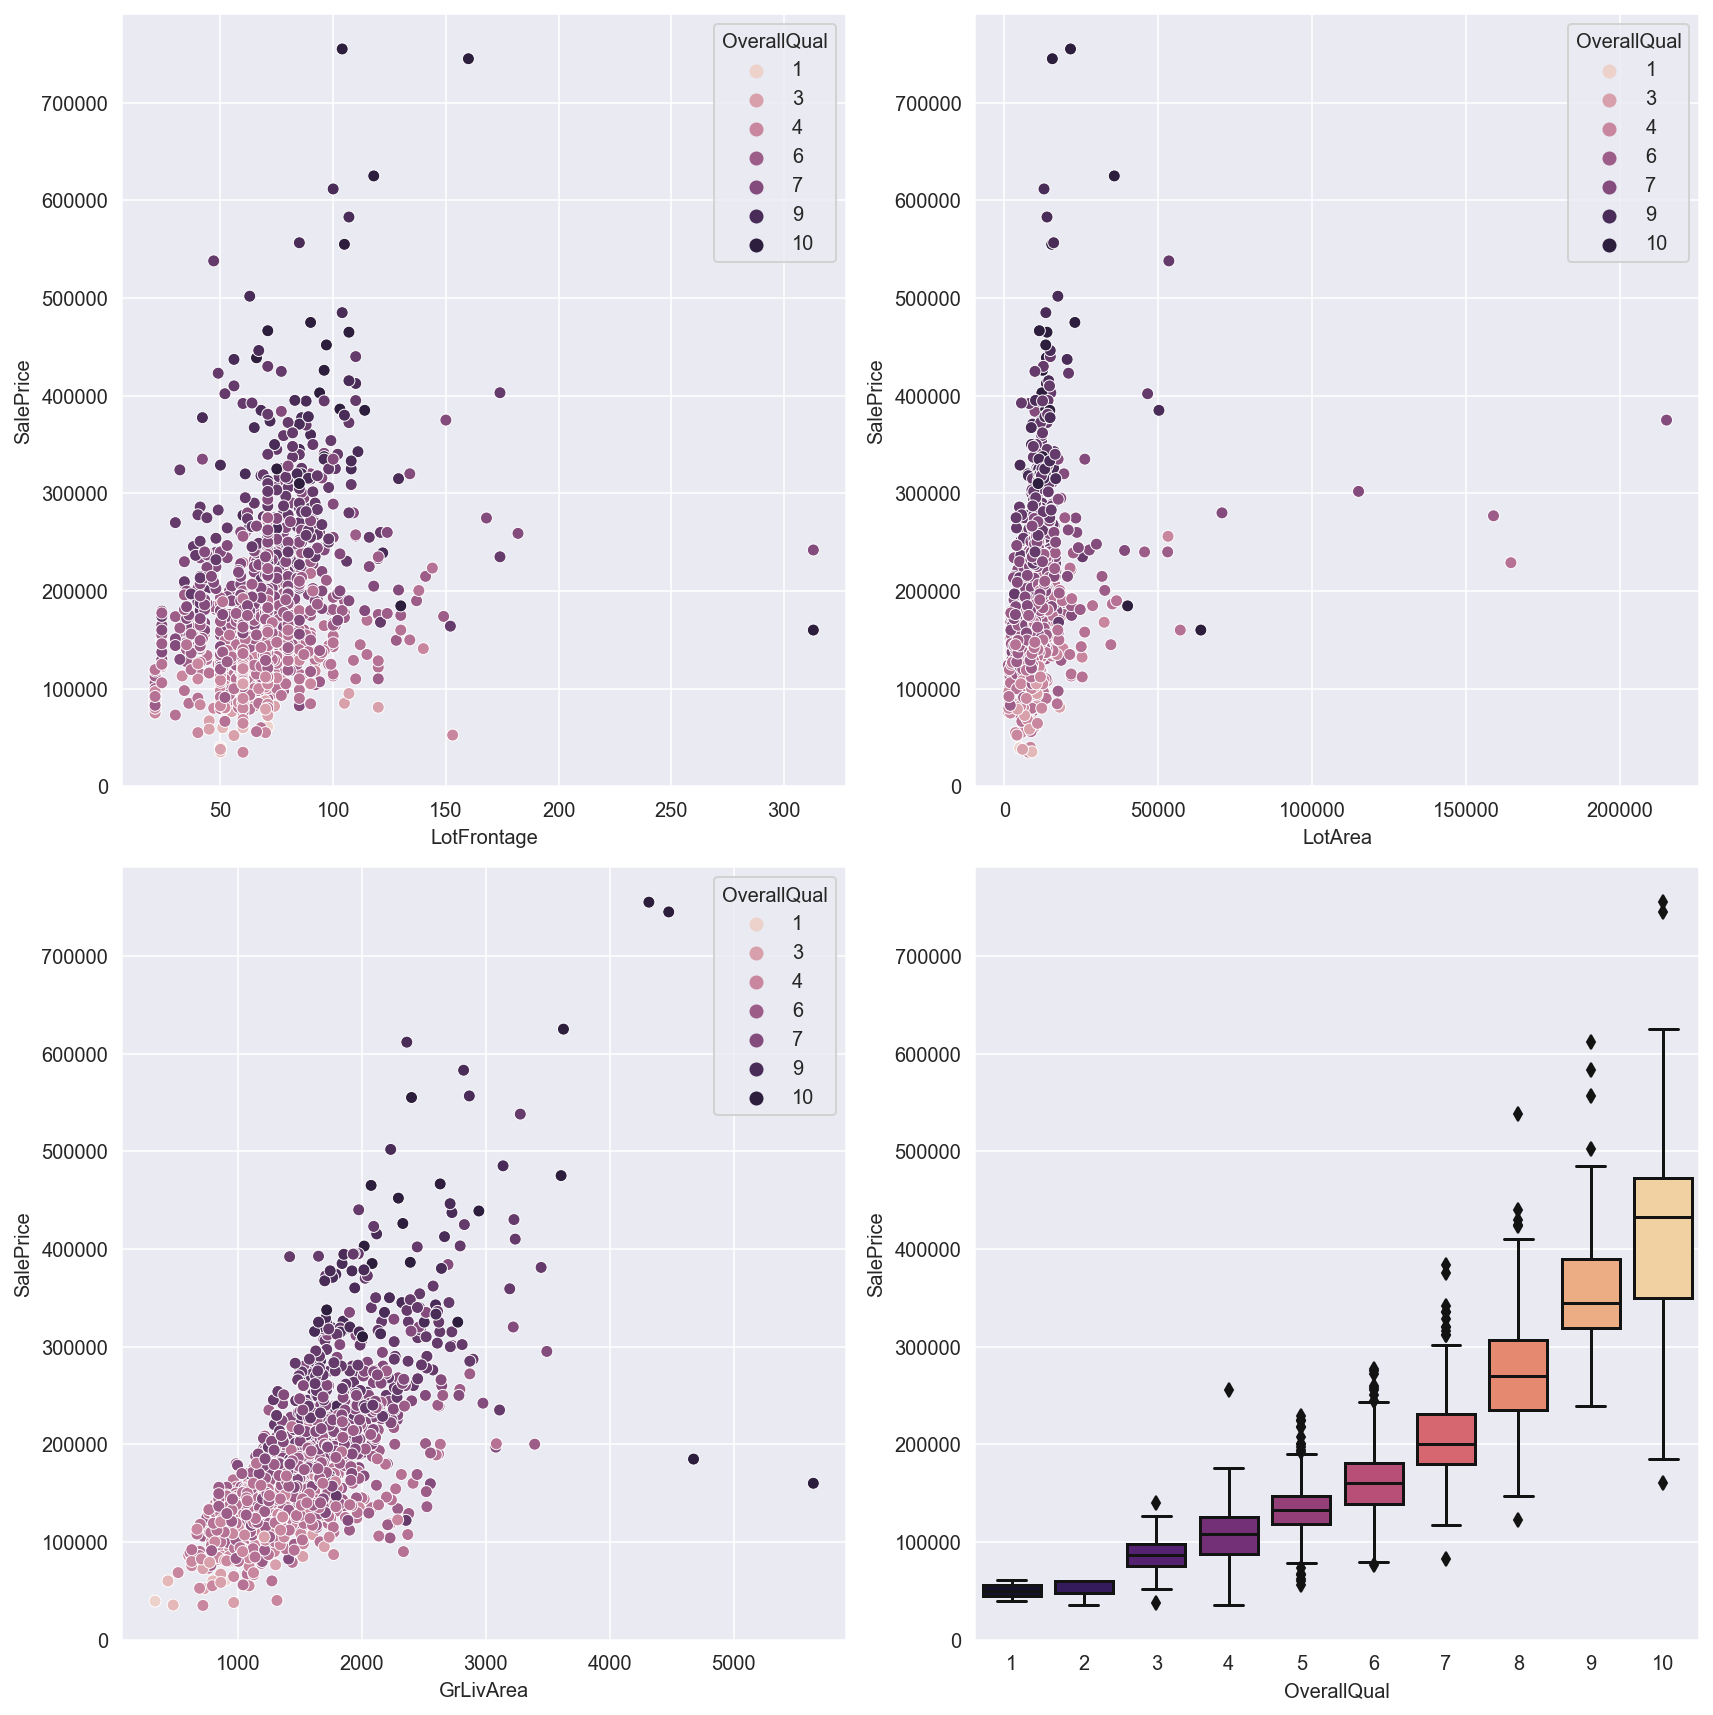

In [20]:
#Plotting some outliers

fig, axes= plt.subplots(2,2, figsize=(12,12))
sns.scatterplot(data=data_train,x='LotFrontage',y='SalePrice', hue='OverallQual', ax=axes[0,0])
sns.scatterplot(data=data_train,x='LotArea',y='SalePrice', hue='OverallQual', ax=axes[0,1])
sns.scatterplot(data=data_train,x='GrLivArea',y='SalePrice', hue='OverallQual', ax=axes[1,0])
sns.boxplot(x=data_train['OverallQual'],y=data_train['SalePrice'], ax=axes[1,1])
plt.tight_layout();

### FEATURE ENGINEERING

In order to define new features and to detect no necessary ones, we will use correlation and multicorrelation values for the features. Multicollinearity can be explained by VIF (Variance Inflation Factor). A high value for a feature indicates that the feature is over-correlated with some other features in the dataset. Let´s take a look and see how we can improve it.

In [14]:
#Custom function to calculate the VIF value for a dataframe.

def vif_explore(data):
    
    ''' 
    This function takes as argument a dataframe and prints out a dataframe with the VIF factor of each feature.
        
    Input:  data (a dataframe)
    Output: dataframe with VIF factors
    
    '''
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    vif=pd.DataFrame()
    numerical=data.select_dtypes(exclude='object')
    vif['vif factor']=[variance_inflation_factor(numerical.values,i) for i in range(numerical.shape[1])]
    vif['Features']=numerical.columns
    return vif


There is a high multicollinearity in our data, we have features highly related to others, some variables with an infinite value.

In [10]:
vif_explore(data_train)

C:\Users\Arantxa Fernandez\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif factor,Features
0,15.449,LotFrontage
1,2.682,LotArea
2,74.982,OverallQual
3,42.169,OverallCond
4,17689.361,YearBuilt
5,21152.617,YearRemodAdd
6,1.879,MasVnrArea
7,inf,BsmtFinSF1
8,inf,BsmtFinSF2
9,inf,BsmtUnfSF


It is not good for out model to have a collection of input features with such a high level of correlation. We need to improve this. One way is to add some new features for replacing old ones with a lower level of dependency. 

In [21]:
#Custom fuction to define new features

def new_features(data):
    '''
    This function takes a dataframe as input an outputs the same dataframe with the new features inserted.
    Input: data (a dataframe)
    Output: data (a dataframe with new features in)
    
    '''

    data['Bsmt']=data['BsmtFinSF1']+data['BsmtUnfSF']+data['BsmtFinSF2']
    data['1st2ndFlr']=data['1stFlrSF']+data['2ndFlrSF']
    data['baths']=data['FullBath']+data['BsmtFullBath']+(0.5)*(data['BsmtHalfBath']+data['HalfBath'])
    data['LotArea_sq']=np.sqrt(data['LotArea'])
    data['Total_liv']=data['TotalBsmtSF']+data['GrLivArea']

    #New 'Years' Features

    data['HasRemod']=[1 if i!=0 else 0 for i in (data['YearRemodAdd']-data['YearBuilt'])]
    temp=[]
    for idx, i in enumerate(data['YearRemodAdd']):
        if i==0:
            temp.append(max(data['YearBuilt'])-data['YearBuilt'][idx])
        else:
            temp.append(max(data['YearBuilt'])-i)

    data['RealYears']=temp           

    #Binning 'RealYears'

    for idx,i in enumerate(data['RealYears']):
        if i==0:
            data['RealYears'][idx]=6
        elif 0<i<=5:
            data['RealYears'][idx]=5
        elif 5<i<=15:
            data['RealYears'][idx]=4
        elif 15<i<=35:
            data['RealYears'][idx]=3
        elif 35<i<=55:
            data['RealYears'][idx]=2
        elif 55<i<=80:
            data['RealYears'][idx]=1
        else:
            data['RealYears'][idx]=0

    #New binary features

    data['HasLowQualSF']=[0 if i==0 else 1 for i in data['LowQualFinSF']]
    data['HasGarage']=[0 if i==0 else 1 for i in data['GarageYrBlt']]
    data['kitchen_Gr']=[1 if i==1 else 0 for i in data['KitchenAbvGr']]
    data['HasPool']=[0 if i==0 else 1 for i in data['PoolArea']]
    temp=data['OpenPorchSF']+data['EnclosedPorch']+data['3SsnPorch']+data['ScreenPorch']
    data['HasPorch']=[0 if i==0 else 1 for i in temp]
    
    return data

data_train=new_features(data_train)
data_test=new_features(data_test)

After creating the new collection of features above, we should have to drop these old ones: 

'GarageArea', 'YrSold', 'MoSold', 'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFinSF2','1stFlrSF', '2ndFlrSF', 'FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'LotArea', 'TotalBsmtSF', 'GrLivArea', 'YearRemodAdd', 'YearBuilt', 'LowQualFinSF', 'GarageYrBlt', 'KitchenAbvGr', 'PoolArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'.

Another advantage of making new features is that these new variables can improve the correlation with target---> Let´s see some examples with Pearson correlation for some numerical variables here below:

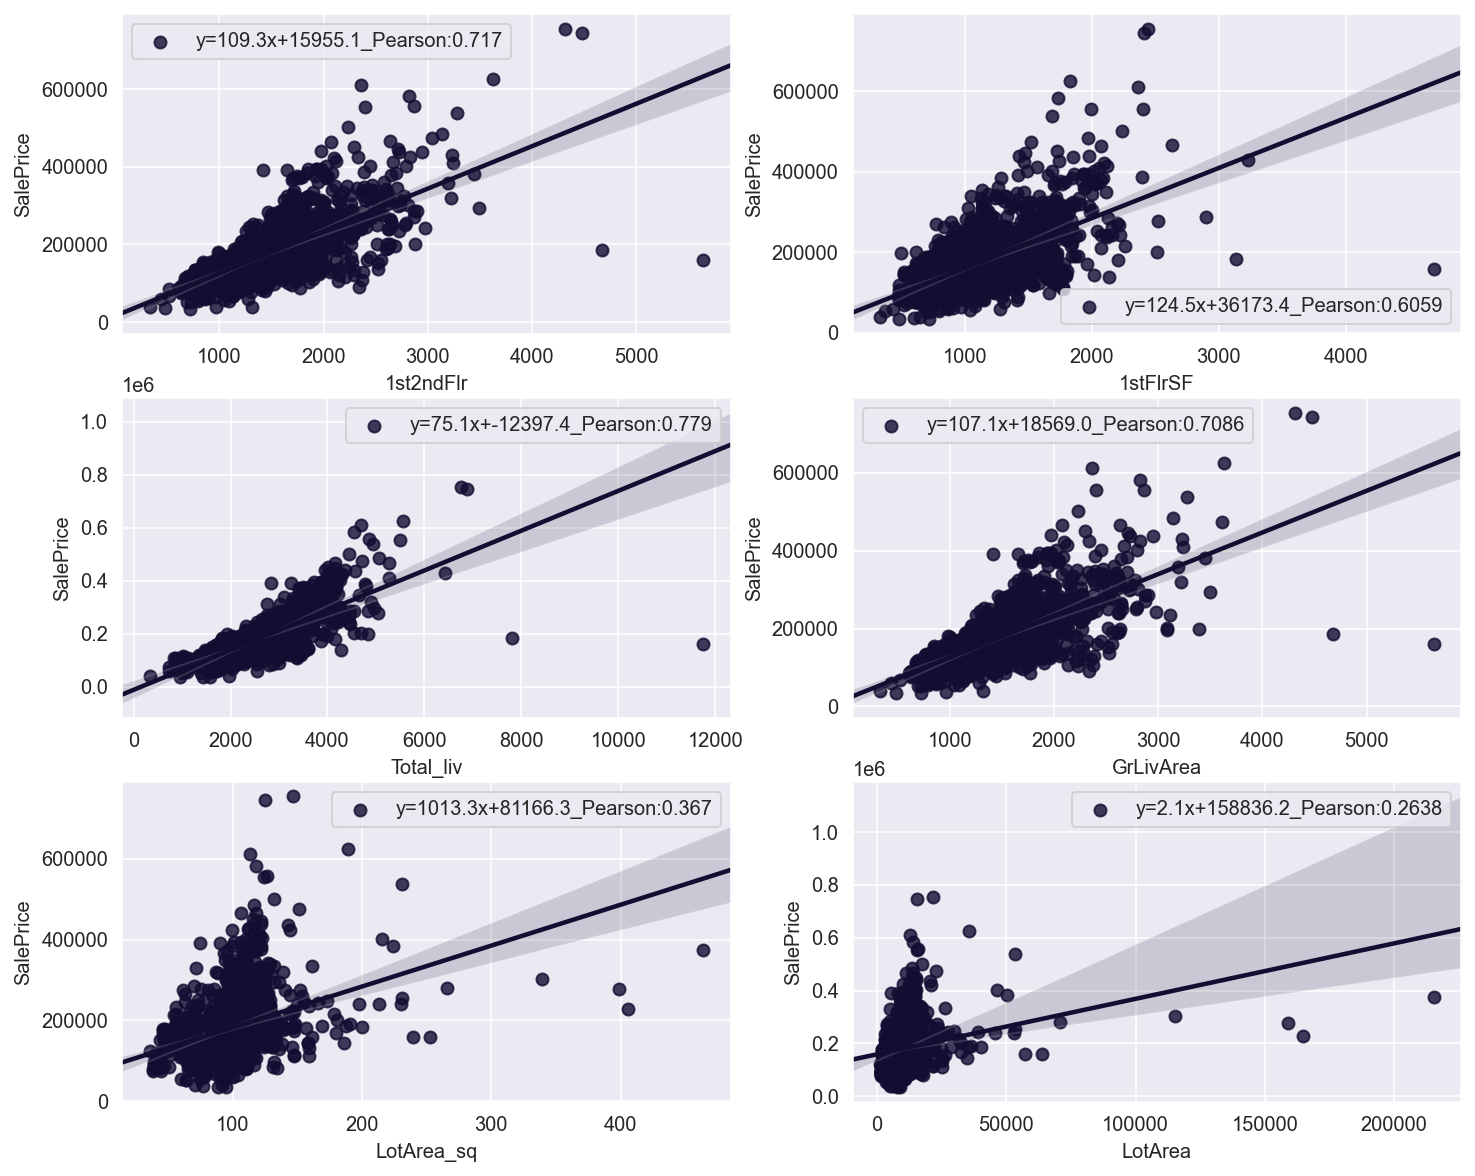

In [18]:
from scipy import stats

fig, axes= plt.subplots(3,2,figsize=(12,10))

def plot_new_old_features(new_feature, old_feature, axis_row_number):

    slope, intercept, r_value, pv, se = stats.linregress(new_feature, data_train['SalePrice'])
    p=sns.regplot(data=data_train, x=new_feature, y='SalePrice',
            label="y={0:.1f}x+{1:.1f}_Pearson:{2:.3f}".format(slope, intercept, r_value), ax=axes[axis_row_number,0],
            truncate=False).legend(loc="best")

    slope, intercept, r_value, pv, se = stats.linregress(old_feature,data_train['SalePrice'])
    sns.regplot(data=data_train, x=old_feature, y='SalePrice',
            label="y={0:.1f}x+{1:.1f}_Pearson:{2:.4f}".format(slope, intercept, r_value), ax=axes[axis_row_number,1],
            truncate=False).legend(loc="best")
    return ;

plot_new_old_features(data_train['1st2ndFlr'], data_train['1stFlrSF'], 0);
plot_new_old_features(data_train['Total_liv'], data_train['GrLivArea'], 1);
plot_new_old_features(data_train['LotArea_sq'], data_train['LotArea'], 2);


Now it´s time to drop some outliers and the features high correlated before proceding. Some outliers are 'rare' cases; as there are houses with good qualities but with a saleprice lower than mean value. We will drop these outliers and also make a cut-off of the extreme values in 'LotArea'. 

In [22]:
#Dropping some outliers in train set: 

lot_f_idx=data_train[(data_train['LotFrontage']>250) & (data_train['SalePrice']<300000)].index
GrLiv_idx=data_train[(data_train['GrLivArea']>4000) & (data_train['SalePrice']<200000)].index
set_drop=(set(lot_f_idx)^set(GrLiv_idx)).union(set(lot_f_idx)&set(GrLiv_idx))
data_train=data_train.drop(set_drop)

lot_area_idx=data_train[(data_train['LotArea']>100000) & (data_train['SalePrice']<400000)].index
data_train['LotArea'][lot_area_idx]=75000

data_train.reset_index(inplace=True)
data_train=data_train.drop('index', axis=1)

In [23]:
#Custom function to drop correlated columns

def drop_features(data):
    ''' 
    This function takes as argument a dataframe with original features and outputs the same
    dataframe dropping some predefined features.
        
    Input:   data (a dataframe)
    
    Outputs: ID_column (the original ID column dropped)
             data (dataframe with no required features dropped)
    
    '''
    
    drop_features= ['GarageArea', 'YrSold', 'MoSold',  'BsmtFinSF1', 'BsmtUnfSF', 'BsmtFinSF2',
                    '1stFlrSF','2ndFlrSF','FullBath', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'LotArea', 
                    'TotalBsmtSF','GrLivArea','YearRemodAdd', 'YearBuilt', 'LowQualFinSF', 'GarageYrBlt', 
                    'KitchenAbvGr','PoolArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                   ]
    
    data.drop(drop_features, axis=1, inplace=True)
    return data

data_train=drop_features(data_train)
data_test=drop_features(data_test)

New multicollinearity value: We have now all finite values in VIF and also have increased multicollinearity with target. Nevertheless we have still some high values that would be desirable to decrease, but we will keep the actual subset of features to demonstrate how this high values are related with a big correlation (linear or nor linear) between the variables.

In [15]:
vif_explore(data_train)

,vif factor,Features
0,18.416,LotFrontage
1,62.046,OverallQual
2,26.665,OverallCond
3,1.820,MasVnrArea
4,31.149,BedroomAbvGr
5,73.768,TotRmsAbvGrd
6,2.748,Fireplaces
7,19.492,GarageCars
8,1.830,WoodDeckSF
9,1.028,MiscVal


Now, it´s time to explore categorical variables, and make some encodings to subset them into binary, nominal and ordinal features.

In [24]:
#Custom function to encode categorical data.

def converting_categorical(data):
    
    '''
    This function takes a dataframe and maps the categorical features with a correct mapping dict.
    Input: data (a dataframe)
    Output: data (a dataframe with categorical variables mapped into binary, nominal and ordinal features)
    
    '''
    
    #Converting to binary 
    
    binaries=['Street', 'Condition1', 'Condition2', 'RoofStyle','RoofMatl','Heating','Electrical',
              'Functional','MiscFeature','CentralAir']
    
    for col in binaries:
        data[col]=data[col].apply(lambda x: 0 if x==data[col].value_counts(ascending=False).index[0] else 1)


    #Reducing cardinality in some nominal variables

    MSSubClass_dict   =   {20:'0',60:'1',50:'2',120:'3',30:'4',40:'4',45:'4',70:'5',75:'5',160:'5',80:'6',
                           85:'6',180:'6',90:'7',190:'7'}

    Neighborhood_dict =   {'NAmes':'0','CollgCr':'1','OldTown':'2','Edwards':'3','Somerst':'3','Gilbert':'3',
                           'NridgHt':'4','NWAmes':'4','Sawyer':'4','SawyerW':'5','BrkSide':'5','Crawfor':'5',
                           'Mitchel':'5','NoRidge':'5','Timber':'5','IDOTRR':'5','ClearCr':'6','SWISU':'6',
                           'StoneBr':'6','MeadowV':'6','Blmngtn':'6','BrDale':'7','Veenker':'7','NPkVill':'7',
                           'Blueste':'7'}

    Exteriors1_dict   =   {'VinylSd':'0','HdBoard':'1','MetalSd':'2','Wd Sdng':'3','Plywood':'4','CemntBd':'5',
                           'BrkFace':'6', 'WdShing':'6', 'AsbShng':'6', 'Stucco':'6', 'BrkComm':'6', 'AsphShn':'6',
                           'Stone':'6', 'ImStucc':'6', 'CBlock':'6'}
    
    Exteriors2_dict   =   {'VinylSd':'0','HdBoard':'1','MetalSd':'2','Wd Sdng':'3','Plywood':'4','CmentBd':'5',
                           'Wd Shng':'6', 'BrkFace':'7', 'Stucco':'7', 'AsbShng':'7', 'Brk Cmn':'7', 'ImStucc':'7',
                           'AsphShn':'7', 'Stone':'7', 'Other':'7', 'CBlock':'7'}
    
    Foundation_dict   =   {'PConc':'0','CBlock':'1','BrkTil':'2','Slab':'3','Stone':'4','Wood':'5'}  
    
    SaleType_dict     =   {'WD':'0','New':'1','COD':'2','ConLD':'3','ConLI':'3','ConLw':'3','CWD':'3', 
                           'Oth':'3', 'Con':'3'}
    
    
    #Converting to ordinal variables
    
    GarageQual_dict   =   {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    GarageCond_dict   =   {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    ExterCond_dict    =   {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    ExterQual_dict    =   {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    LotShape_dict     =   {'IR3':0,'IR2':1,'IR1':2,'Reg':3} 
    LandSlope_dict    =   {'Sev':0,'Mod':1,'Gtl':2}
    LandContour_dict  =   {'Low':0,'HLS':1,'Bnk':2, 'Lvl':3}
    BsmtFinType1_dict =   {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5, 'GLQ':6}
    BsmtFinType2_dict =   {'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5, 'GLQ':6}
    BsmtQual_dict     =   {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    BsmtCond_dict     =   {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    KitchenQual_dict  =   {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    BsmtExposure_dict =   {'None':0,'No':1,'Mn':2,'Av':3,'Gd':4}
    GarageFinish_dict =   {'None':0,'Unf':1,'RFn':2,'Fin':3}
    PoolQC_dict       =   {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    Fence_dict        =   {'None':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4}
    PavedDrive_dict   =   {'N':0,'P':1,'Y':2}
    HeatingQC_dict    =   {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    Alley_dict        =   {'None':0,'Pave':1,'Grvl':2}
    FireplaceQu_dict  =   {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
    
    columns_          =   ['MSSubClass','Neighborhood','Exterior1st','Exterior2nd','Foundation','SaleType',
                          'GarageQual','GarageCond','ExterCond','ExterQual','LotShape','LandSlope','LandContour',
                          'BsmtFinType1','BsmtFinType2','BsmtQual','BsmtCond','KitchenQual','BsmtExposure','GarageFinish',
                          'PoolQC','Fence','PavedDrive','HeatingQC','Alley','FireplaceQu']
    
    Dicts  =  [MSSubClass_dict,Neighborhood_dict,Exteriors1_dict,Exteriors2_dict,Foundation_dict,SaleType_dict,
               GarageQual_dict,GarageCond_dict,ExterCond_dict,ExterQual_dict,LotShape_dict,LandSlope_dict,LandContour_dict,
               BsmtFinType1_dict,BsmtFinType2_dict,BsmtQual_dict,BsmtCond_dict,KitchenQual_dict,BsmtExposure_dict,
               GarageFinish_dict,PoolQC_dict,Fence_dict,PavedDrive_dict,HeatingQC_dict,Alley_dict,FireplaceQu_dict]


    for col in columns_:
        data[col]=data[col].map(Dicts[columns_.index(col)])


converting_categorical(data_train)
converting_categorical(data_test)

#### Subdividing into 'feature-type' subsets and target:

In [25]:
target    =data_train['SalePrice']
nominal   =data_train.select_dtypes('object').columns
binary    =data_train[[col for col in (data_train.select_dtypes('int')) if data_train[col].nunique()==2]].columns
numerical =data_train.select_dtypes('float').columns

all_columns=nominal.append(binary).append(numerical)
ordinal   =data_train[[col for col in data_train.columns if col not in all_columns]].columns

### CORRELATIONS BETWEEN FEATURES

Let´s examine first the correlation between numerical features and the target. As we already know there are some new features that are highly correlated. But these ones will be removed with 'feature selection' techniques below.

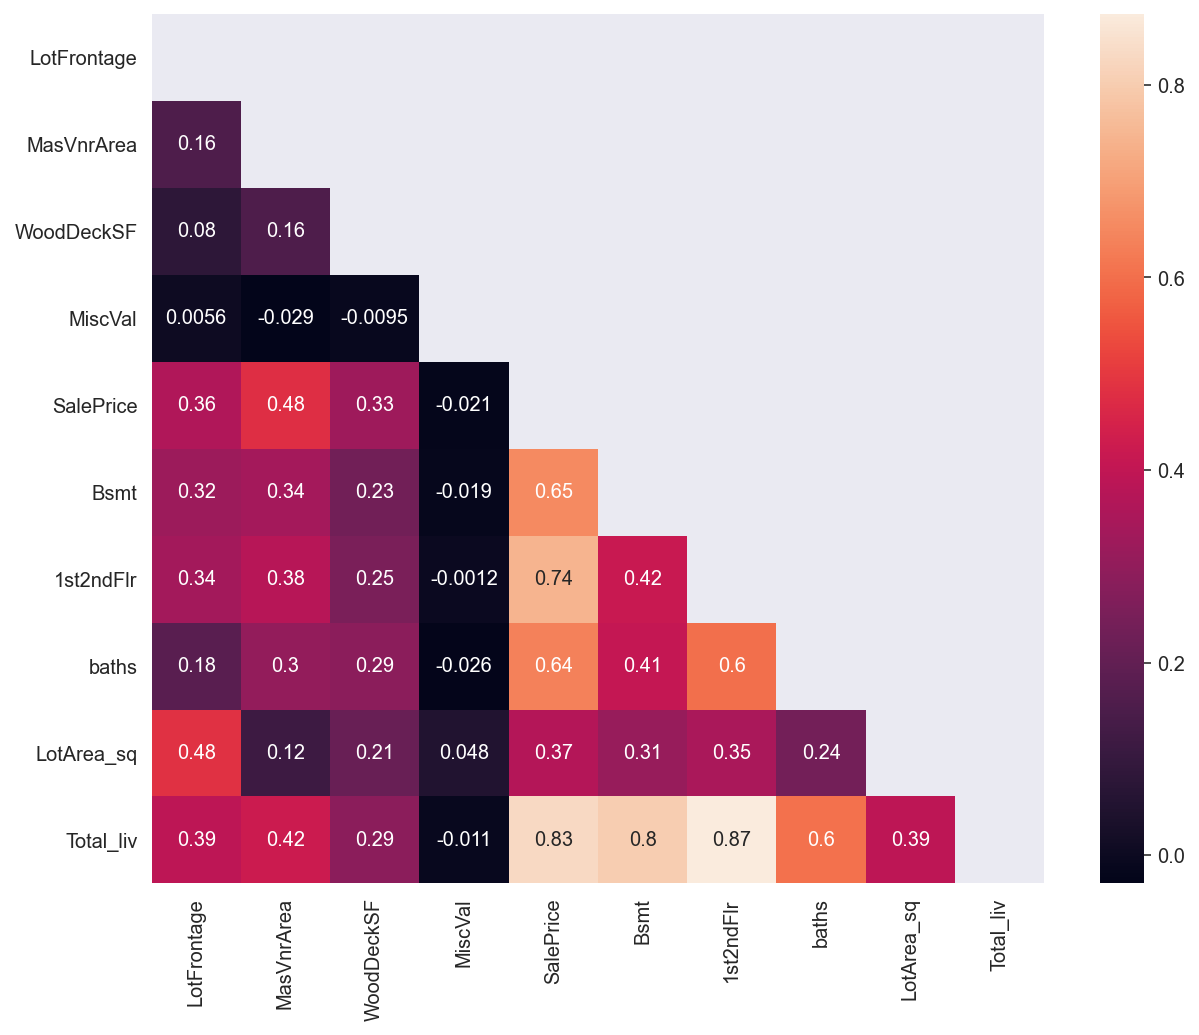

In [17]:
#Custom function to calculate Pearson Correlation for numerical features

def heat_map_corr(data, method):
    
    ''' 
    This function takes as argument a dataframe and prints out the heatmap with correlation values higher
    than a percentage of correlation.
        
    Input:  data (a dataframe), percent (percentage of correlation)
    Output: Heatmap
    
    '''
    X_corr=data.corr(method=method)
    f, ax = plt.subplots(figsize=(10,8))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    mask = np.triu(np.ones_like(X_corr, dtype=bool))
    sns.heatmap(X_corr, mask=mask, annot=True);
    return X_corr

num_corr=heat_map_corr(data_train[numerical], 'pearson')

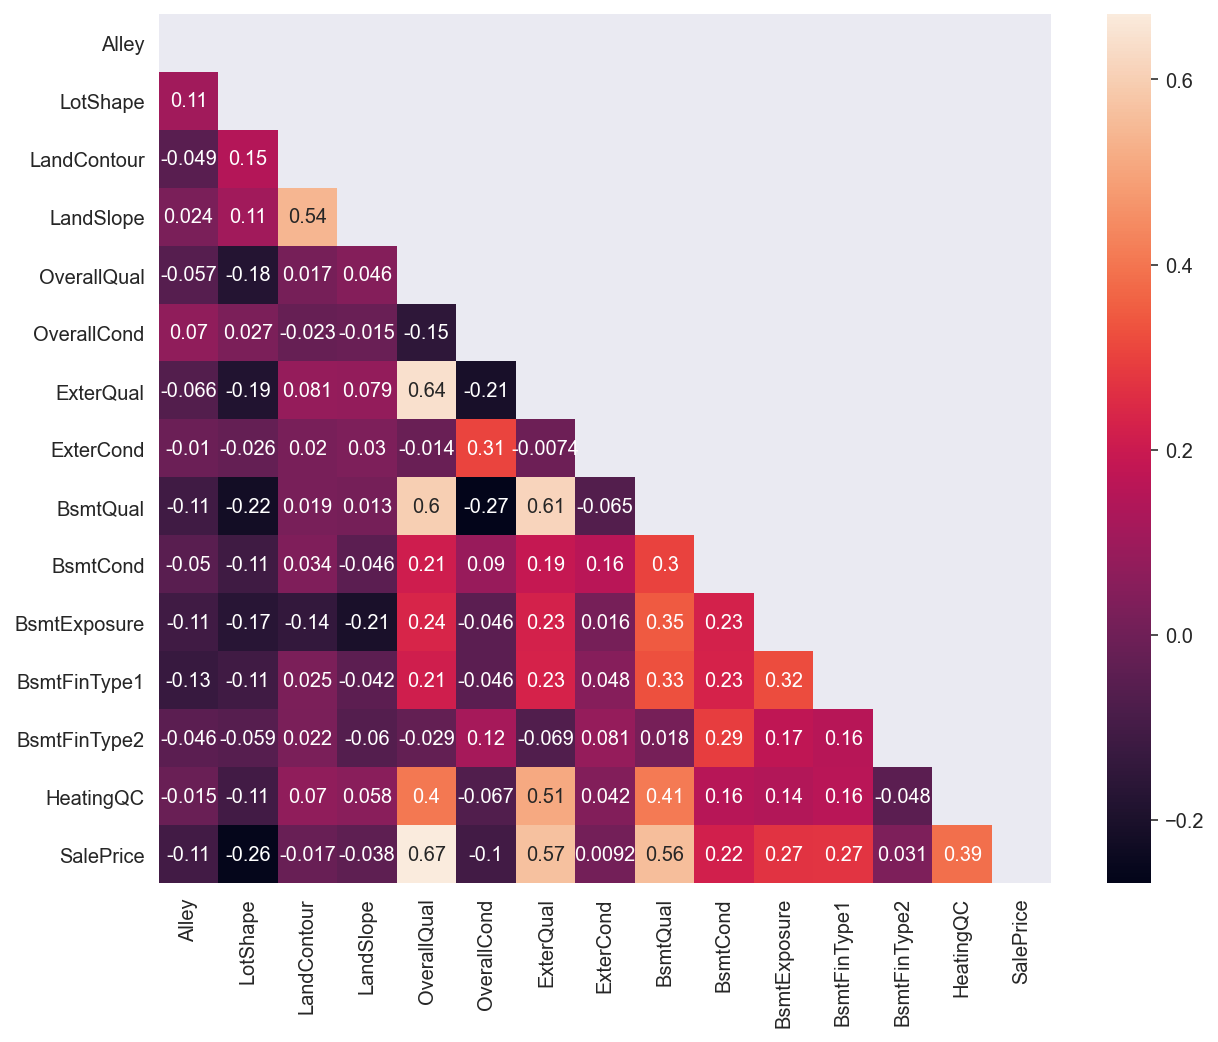

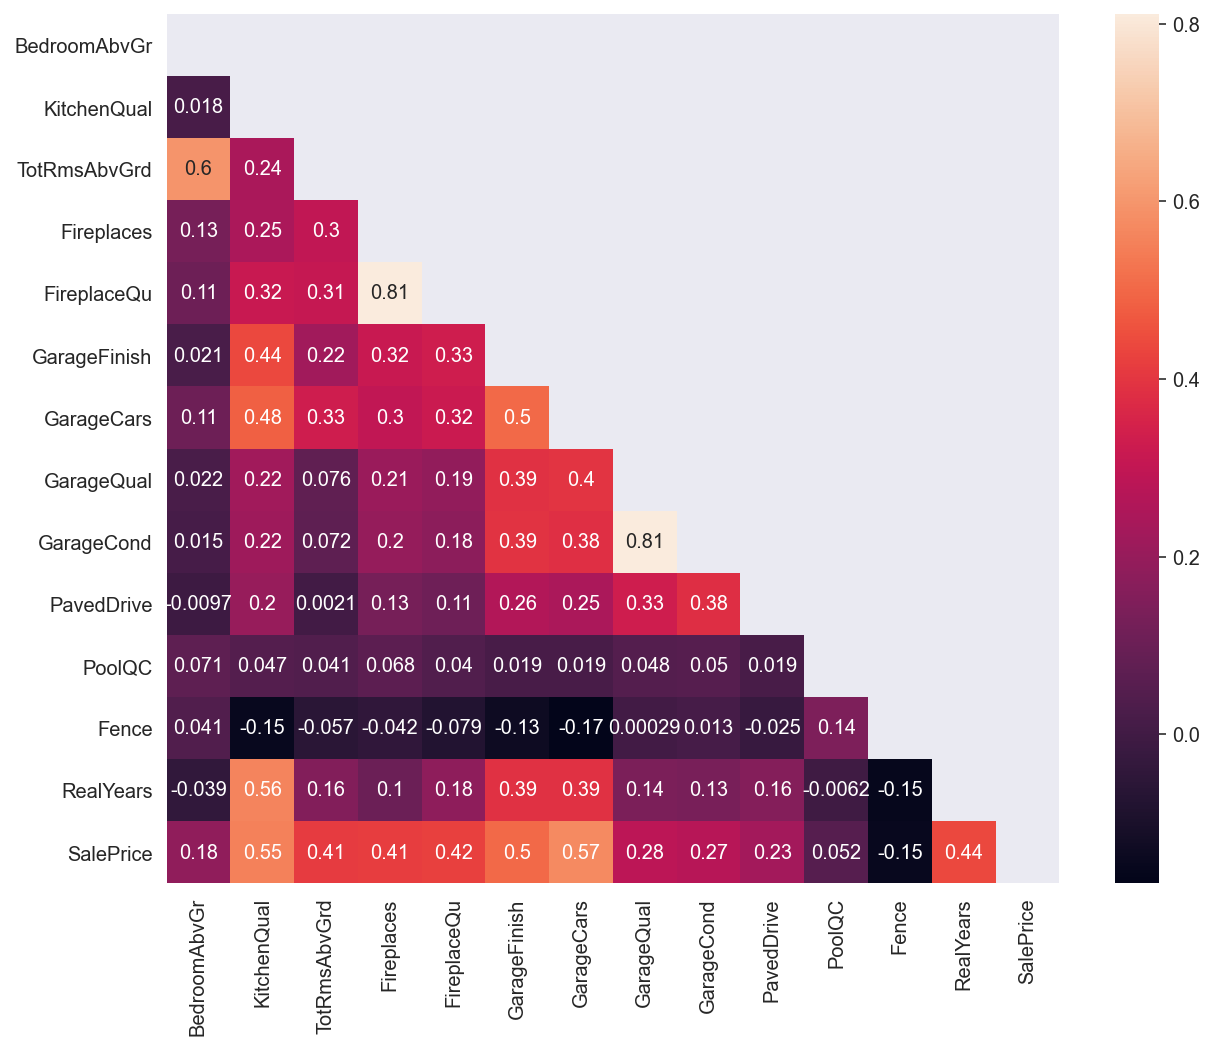

In [18]:
#Kendall method for correlation of binary and ordinal features.

index_=list(ordinal.values)
ordinals=data_train[index_]
ordinals_1=ordinals.iloc[:,:14].join(data_train['SalePrice'])
ordinals_2=ordinals.iloc[:,14:].join(data_train['SalePrice'])

ordinals1_corr=heat_map_corr(ordinals_1, 'kendall')
ordinals2_corr=heat_map_corr(ordinals_2, 'kendall')

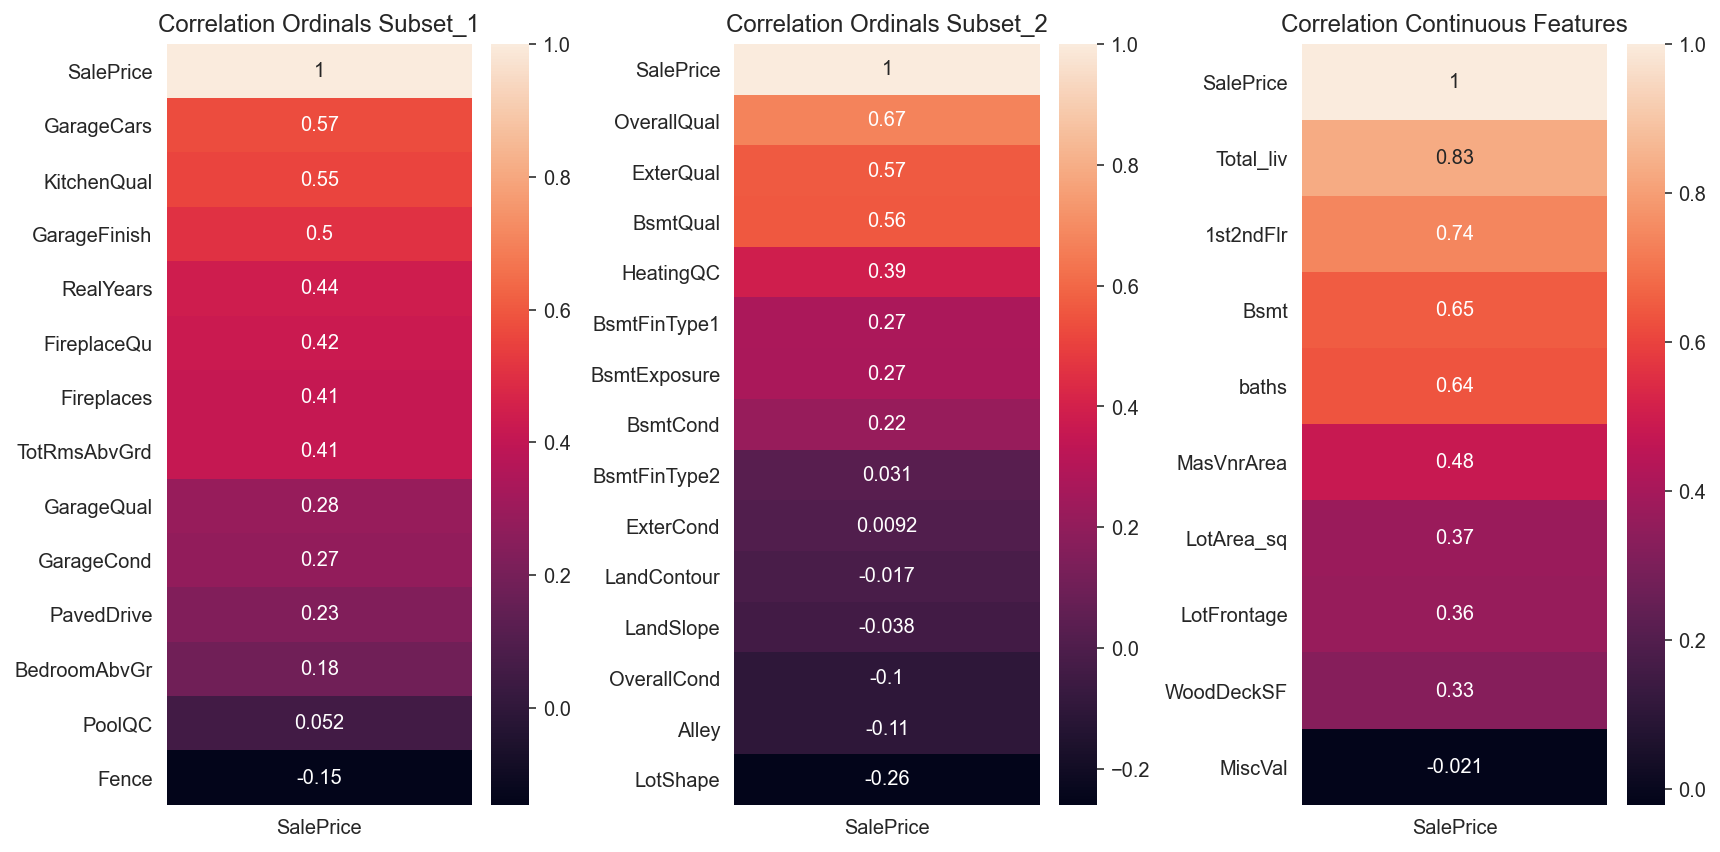

In [19]:
#Analyzing correlation of numerical and ordinal features with target

fig, axes= plt.subplots(1,3,figsize=(12,6))
sorted_corr_ord2=pd.DataFrame(ordinals2_corr['SalePrice'].sort_values(ascending=False))
sns.heatmap(sorted_corr_ord2, annot=True, ax=axes[0]).set_title('Correlation Ordinals Subset_1')

sorted_corr_ord1=pd.DataFrame(ordinals1_corr['SalePrice'].sort_values(ascending=False))
sns.heatmap(sorted_corr_ord1, annot=True, ax=axes[1]).set_title('Correlation Ordinals Subset_2')

sorted_corr_cont=pd.DataFrame(num_corr['SalePrice'].sort_values(ascending=False))
sns.heatmap(sorted_corr_cont, annot=True, ax=axes[2]).set_title('Correlation Continuous Features')
plt.tight_layout();

In [20]:
#ANOVA method for correlation between categorical features and target (we will use our custom function above 
#called 'best_corr_name')

out=[]
for col in nominal:
    best_corr_name=best_cat_corr(data_train.drop(out, axis=1), 'SalePrice')
    out.append(best_corr_name)

out

The best correlation for SalePrice is : Foundation with 2.731007011015835e-91
The best correlation for SalePrice is : GarageType with 5.459017218619975e-87
The best correlation for SalePrice is : MSSubClass with 2.0091981561867634e-80
The best correlation for SalePrice is : MasVnrType with 2.1172036561352903e-64
The best correlation for SalePrice is : SaleType with 3.666469636999125e-45
The best correlation for SalePrice is : SaleCondition with 1.434059130453518e-44
The best correlation for SalePrice is : Exterior1st with 8.132587228143392e-43
The best correlation for SalePrice is : Exterior2nd with 2.133577605955312e-41
The best correlation for SalePrice is : MSZoning with 1.0559704450009887e-34
The best correlation for SalePrice is : Neighborhood with 1.1127969762550205e-32
The best correlation for SalePrice is : HouseStyle with 2.82897808476085e-25
The best correlation for SalePrice is : BldgType with 2.2001246072095118e-10
The best correlation for SalePrice is : LotConfig with 3.09

['Foundation',
 'GarageType',
 'MSSubClass',
 'MasVnrType',
 'SaleType',
 'SaleCondition',
 'Exterior1st',
 'Exterior2nd',
 'MSZoning',
 'Neighborhood',
 'HouseStyle',
 'BldgType',
 'LotConfig']

#### Testing which 'Scaling method' fits better to our data

One more step before making transformations in data: We need to scale our data to improve model performance and also to contribute to a faster convergence of the model. We will compare for that several Scaling methods. We need to perform a One Hot Encoding for categorical features in the dataset; but for the selection of the scaling method, we will perform a Label Encoder just to test it, as we don´t care about accuracy right now. Linear Regression will be the model chosen for testing the model performance and MSE the metric to evaluate the cost function.

In [27]:
#Scaling numericals features:

data_temp=data_train.drop('SalePrice', axis=1)
numerical=data_temp.select_dtypes('float').columns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

std_scale=StandardScaler()
min_scale=MinMaxScaler()
rob_scale=RobustScaler()

numerical_std=pd.DataFrame(std_scale.fit_transform(data_temp[numerical]))
numerical_min=pd.DataFrame(min_scale.fit_transform(data_temp[numerical]))
numerical_rob=pd.DataFrame(rob_scale.fit_transform(data_temp[numerical]))
numerical_std.columns=numerical_min.columns=numerical_rob.columns=data_temp[numerical].columns

In [34]:
#Label encoding for nominal features: it´s not the best way of encoding nominal features. We will use OneHot later.

import category_encoders as ce

OrdEnc=ce.ordinal.OrdinalEncoder(return_df=True, cols=nominal)
data_train=OrdEnc.fit_transform(data_train)

In [26]:
#DEFINING A BASELINE MODEL with a custom function.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

def linearmodel(data, target):
    linearmodel=LinearRegression()

    folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
    r2_score=cross_val_score(linearmodel, data, target, scoring='r2', cv=folds)
    mse_score = cross_val_score(linearmodel, data, target, scoring='neg_mean_squared_error', cv=folds)

    return r2_score.mean(), np.sqrt(abs(mse_score.mean()))

In [38]:
#Comparing results for each scaling method: 

data_std=data_temp.drop(numerical, axis=1).join(pd.DataFrame(numerical_std))
data_min=data_temp.drop(numerical, axis=1).join(pd.DataFrame(numerical_min))
data_rob=data_temp.drop(numerical, axis=1).join(pd.DataFrame(numerical_rob))

r2_std, rmse_std=linearmodel(data_std, target)
r2_min, rmse_min=linearmodel(data_min, target)
r2_rob, rmse_rob=linearmodel(data_rob, target)

print('R2_std:',r2_std,'RMSE_std mean in 5 Folds: {}'.format(rmse_std))
print('R2_min:',r2_min,'RMSE_min mean in 5 Folds: {}'.format(rmse_min))
print('R2_rob:',r2_rob,'RMSE_rob mean in 5 Folds: {}'.format(rmse_rob))

R2_std: 0.8988052959659971 RMSE_std mean in 5 Folds: 0.12666471384754296
R2_min: 0.8988052959659951 RMSE_min mean in 5 Folds: 0.1266647138475442
R2_rob: 0.8988360931644002 RMSE_rob mean in 5 Folds: 0.12664734562308974


Conclusion: We will use RobustScaler with this set of numerical features. It makes sense as we have multiple outliers in this dataset, so a robust method will perform better.

### TRANSFORMATIONS

Now we have already study correlations, so we can remove the target from the dataset and begin with transformations in data. Also, we have decided to use 'RobustScaler' scaling method and we will make One-hot encoding for nominal features. Now it´s time to check if the distribution shape of our variables are skewed and need any transformation. As we will see, this is the case, and we will use Yeo-Johnsson method for changing the shape to a more 'gaussian' shape.

#### Robust scale for the Train and test set:

In [27]:
from sklearn.preprocessing import RobustScaler

data_train=data_train.drop('SalePrice', axis=1)
numerical=data_train.select_dtypes('float').columns

rob_scale=RobustScaler()
scaled_train=pd.DataFrame(rob_scale.fit_transform(data_train[numerical]))
scaled_test=pd.DataFrame(rob_scale.transform(data_test[numerical]))

scaled_train.columns=data_train[numerical].columns
scaled_test.columns=data_test[numerical].columns

data_train=data_train.drop(numerical, axis=1).join(scaled_train)   
data_test=data_test.drop(numerical, axis=1).join(scaled_test)   

#### Checking the shape of features

In [28]:
#Custom function to plot the shape of a feature. 

from scipy import stats
def feature_shape(feature):
    
    '''
    This function takes a feature and outputs the distribution and Q-Q plots
    '''
    
    # Distribution plot
    
    fig, axes = plt.subplots(1,2,figsize=(12,4))
    sns.distplot(feature, fit=stats.norm, ax=axes[0])
    plt.ylabel('Frequency')
    plt.title ('Feature distribution')
    #plt.legend(['Normal dist. ( $\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(feature.mean(),feature.std())], loc='best');

    # Q-Q Plot
    
    plt.title('Feature distribution')
    stats.probplot(feature, plot=plt);

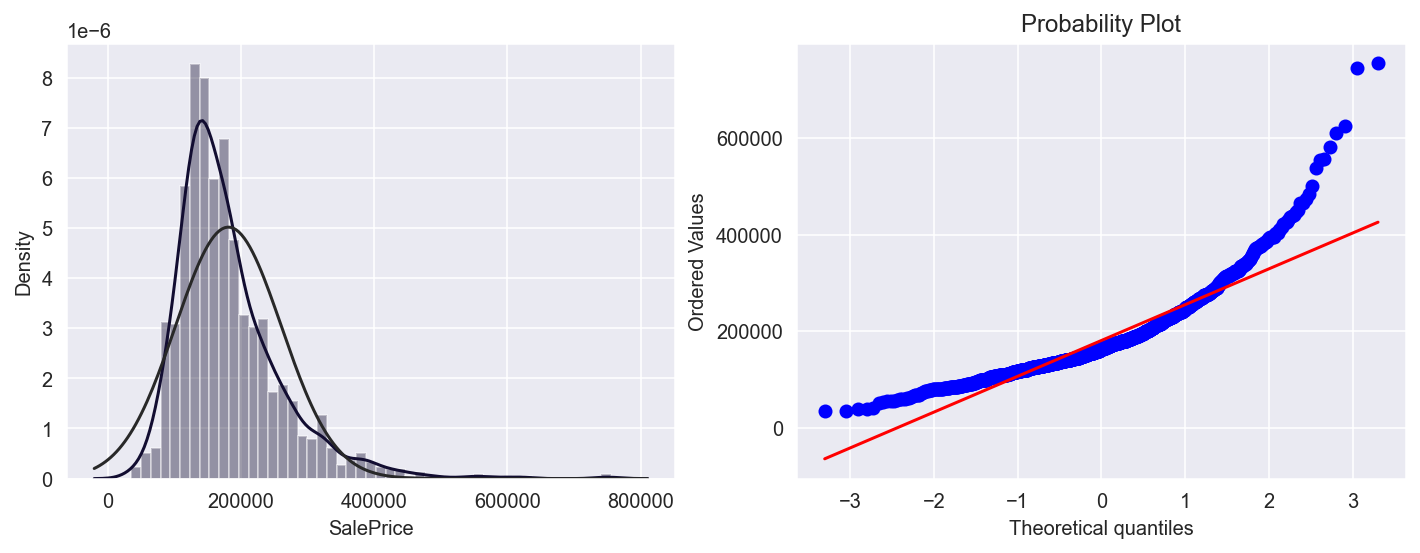

In [17]:
#Target shape

feature_shape(target)

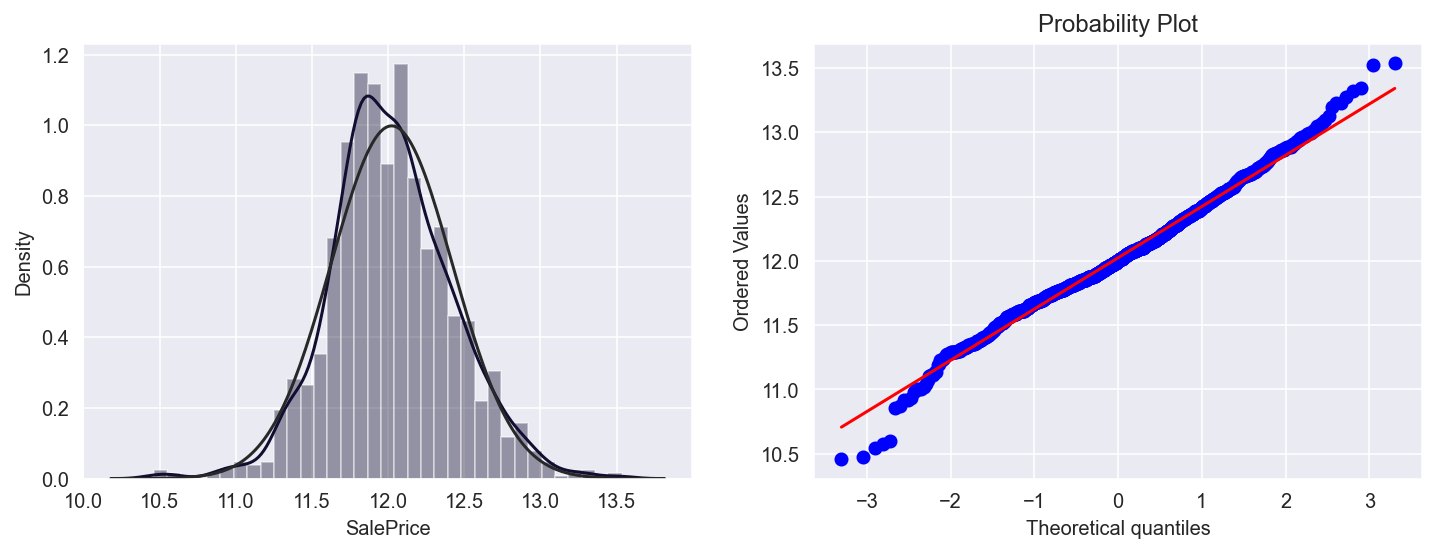

In [29]:
#Tranforming the target shape with a Log Transformation : Closer to a Gaussian distribution.

target=np.log(target)
feature_shape(target)

Let´s explore the shape of numerical features in the dataset. For doing so, we will use Kolmogorov-Smirnov test. This test takes H0 as null hypothesis that supports that Data is gaussian and H1 (alternative hypothesis: the data is not gaussian). As we can conclude below, all the numerical features seems to be NO gaussian (considering a significance level of 0.05).

In [19]:
#Shape of numerical features in the dataset.

from scipy.stats import kstest

for col in numerical:
    print('The Kolmogorov-Smirnov result for {} is:'. format(col))
    kstest(data_train[col], 'norm')


The Kolmogorov-Smirnov result for LotFrontage is:


KstestResult(statistic=0.14653397391901168, pvalue=9.068516886354195e-28)

The Kolmogorov-Smirnov result for MasVnrArea is:


KstestResult(statistic=0.5, pvalue=0.0)

The Kolmogorov-Smirnov result for WoodDeckSF is:


KstestResult(statistic=0.5, pvalue=0.0)

The Kolmogorov-Smirnov result for MiscVal is:


KstestResult(statistic=0.5, pvalue=0.0)

The Kolmogorov-Smirnov result for Bsmt is:


KstestResult(statistic=0.14684606716715637, pvalue=6.925638262101957e-28)

The Kolmogorov-Smirnov result for 1st2ndFlr is:


KstestResult(statistic=0.1284613040986187, pvalue=2.0200411927523988e-21)

The Kolmogorov-Smirnov result for baths is:


KstestResult(statistic=0.28334886411933224, pvalue=5.4035945854241685e-104)

The Kolmogorov-Smirnov result for LotArea_sq is:


KstestResult(statistic=0.0679777369684238, pvalue=2.680381121680937e-06)

The Kolmogorov-Smirnov result for Total_liv is:


KstestResult(statistic=0.12633904625039166, pvalue=9.890539038645981e-21)

We can think about doing some transformations over the features for a more 'normal' shape. As we have negative values in our data, we could use BoxCox Transformations moving previously the distribution shape of the features along the X axis, thus is, adding a constant value to all the values of the feature, to make the minimum value positive (we cannot use BoxCox with negative values). But, there are many other options to deal with zero and negative data, so we will use Yeo-johnson method instead. 

First, we will check for skewness and kurtosis in numerical features. By this way, we will be able to compare the shape and also the reduction in skewness value before and after the transformation.

In [20]:
#Custom function to detect Skew and kurtosis in numerical features : 
#Cutoffs -0.8 to 0.8 for skewness and -3.0 to 3.0 for kurtosis.

def skew_kurt(data_numerical):
    
    '''
    This function takes a dataframe as input and outputs the number of numerical features with skewness and kurtosis 
    and the skew mean value for all the features with skewness in the dataset.
    Input: data (dataframe with numerical features)
    Output: Print out of feature names and value for skewness
    
    '''
    skew_features=[np.abs(data_numerical.skew(axis=0))>0.8]
    skew_features=[x for idx, x in enumerate(skew_features[0].index) if skew_features[0].values[idx]==True]
    kurt_features=[np.abs(data_numerical.kurt(axis=0))>3]
    kurt_features=[x for idx, x in enumerate(kurt_features[0].index) if kurt_features[0].values[idx]==True]
    
    print('The are {} numerical features skewed: {}'.format(len(skew_features),skew_features))
    print('Skew mean of all numerical features: {:.3f}'. format(np.abs(data_train[skew_features].skew(axis=0).mean())))
    print('\n')
    print('The are {} numerical features with kurtosis: {}'.format(len(kurt_features),kurt_features))
    print('Kurtosis mean of all numerical features: {:.3f}'. format(np.abs(data_train[kurt_features].kurt(axis=0).median())))
    
skew_kurt(data_train[numerical])

The are 6 numerical features skewed: ['MasVnrArea', 'WoodDeckSF', 'MiscVal', '1st2ndFlr', 'LotArea_sq', 'Total_liv']
Skew mean of all numerical features: 5.781


The are 5 numerical features with kurtosis: ['LotFrontage', 'MasVnrArea', 'WoodDeckSF', 'MiscVal', 'LotArea_sq']
Kurtosis mean of all numerical features: 10.411


In [30]:
#Yeo-Johnson method for skewed features

from sklearn.preprocessing import PowerTransformer

def yeo_johnson(data, skew_features):
    
    '''
    This functions takes a dataframe and a list of numerical features in dataset and returns the dataset with
    the numerical functions reshaped to a more gaussian distribution using Yeo_johnson method.
    Input: data (dataframe) ; skew_features (list of skewed features in dataframe)
    Output: X (a dataframe with numerical features reshaped)
    
    '''
    data=data[skew_features]
    pt = PowerTransformer(method='yeo-johnson').fit(data)
    X = pd.DataFrame(pt.transform(data), index=data.index, columns=data.columns)
    return X

skew_features=['MasVnrArea', 'WoodDeckSF', 'MiscVal', '1st2ndFlr', 'LotArea_sq', 'Total_liv']

X=yeo_johnson(data_train, skew_features)

In [22]:
#Checking the new mean value of skewness for numerical features after Yeo-Johnson transforming:

np.abs(X.skew(axis=0)).mean()

1.0066254236689502

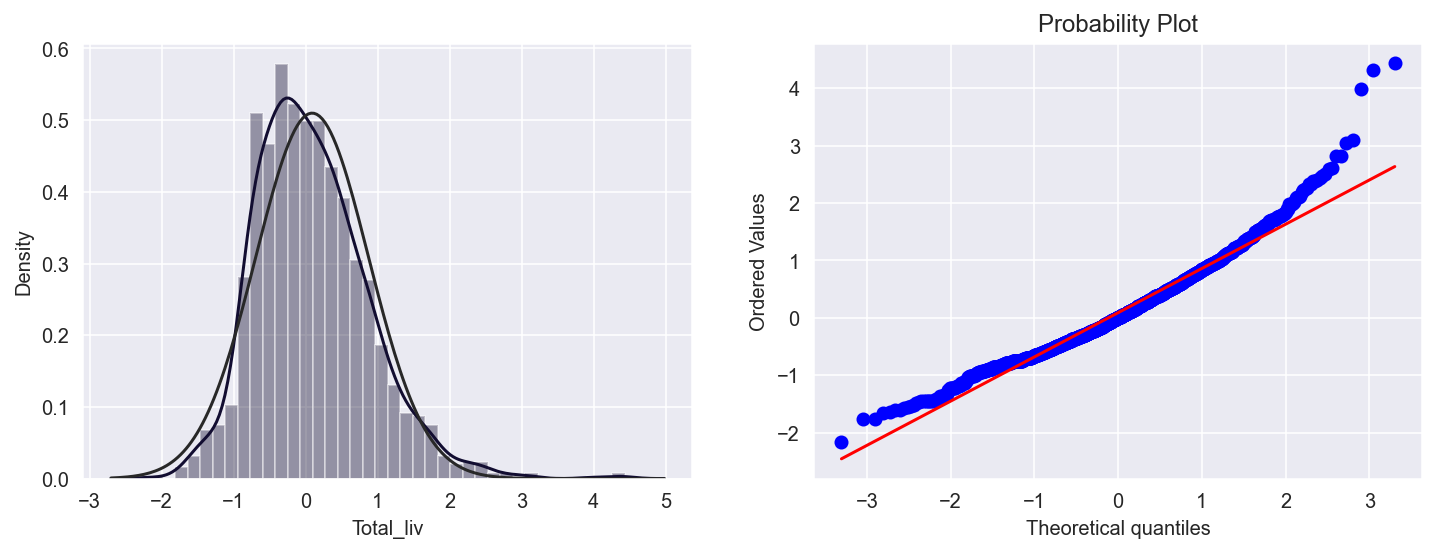

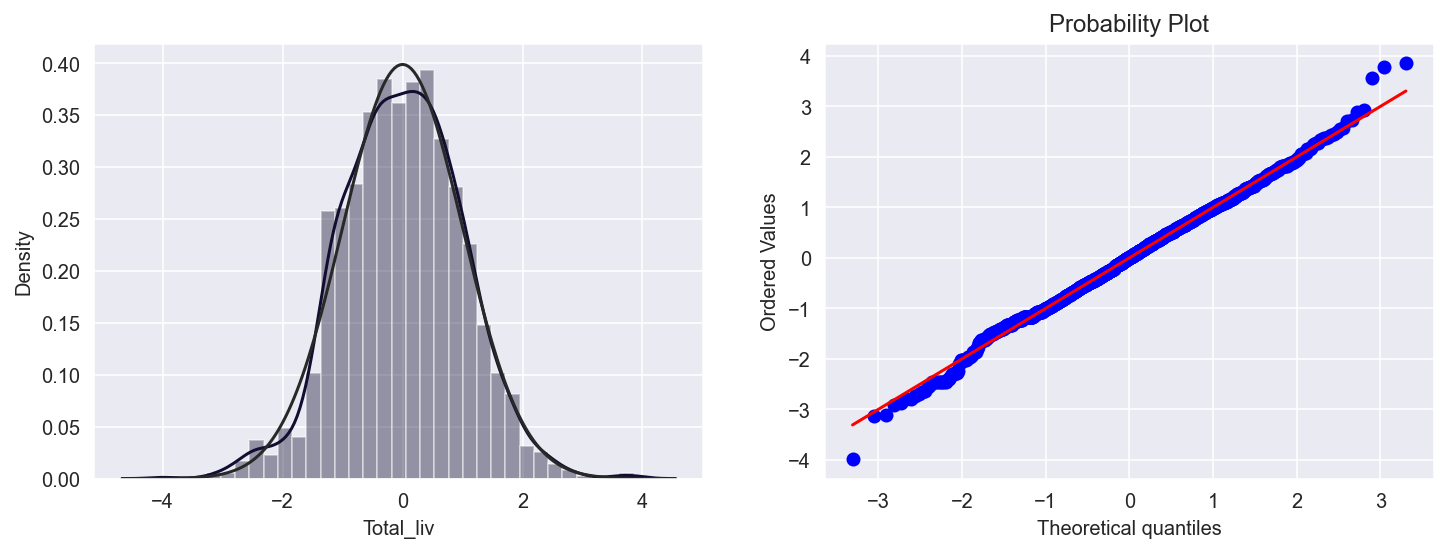

In [23]:
#Comparison between some numerical features before and after transformations. As we can see Q-Q plots fits better.

feature_shape(data_train['Total_liv'])
feature_shape(X['Total_liv'])

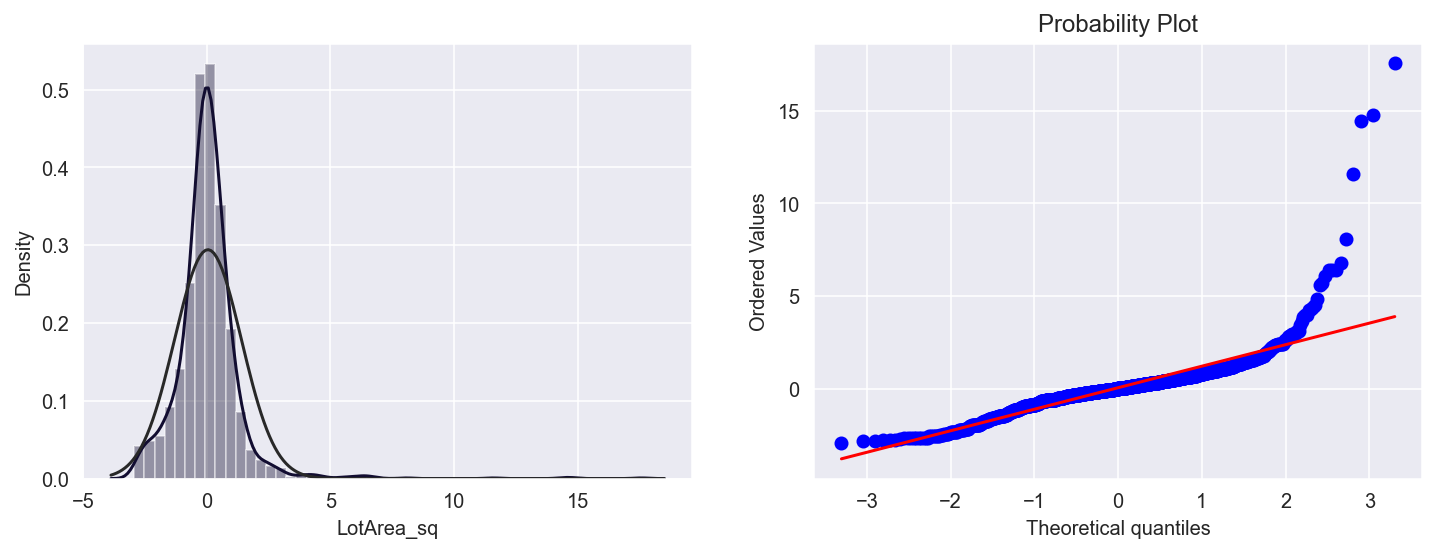

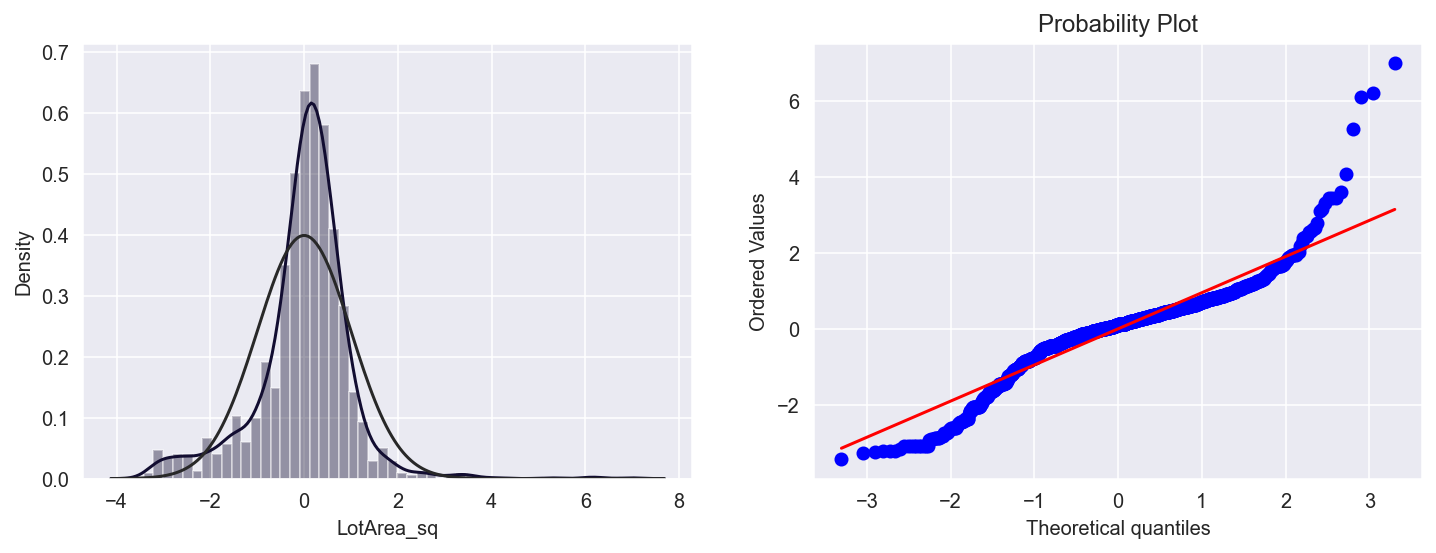

In [24]:
feature_shape(data_train['LotArea_sq'])
feature_shape(X['LotArea_sq'])

Now that we have all features as numeric data types and transformed, we will run a simple LinearRegression model with all the features as a baseline for feature selection methods.

In [31]:
#Transforming numerical features in train and test set:

data_train[skew_features]=yeo_johnson(data_train, skew_features)
data_test[skew_features]=yeo_johnson(data_test, skew_features)

### FEATURE SELECTION

STUDING THE MOST IMPORTANT FEATURES

There are several techniques for performing feature selection. This methods include filter, wrapper or build-in methods. We will compare some of them below, that will help us to decide whether to run our final model over the entire collection of features of our dataset or a subset of them.

#### Method 1: Variance Threshold for numerical features

In [27]:
#Features with a variance near to zero will be drop, as they carry little information that will not affect the target.

from sklearn.feature_selection import VarianceThreshold

var_filter=VarianceThreshold(threshold=0.01)  #Detecting variables with 99% of values nearly the same.
_=var_filter.fit(data_train)

temp=data_train.loc[:, var_filter.get_support()]
removed_columns=[col for col in data_train.columns if col not in temp.columns]
print('Features to remove:', removed_columns)

Features to remove: ['Street', 'Condition2', 'HasPool']


In [30]:
#Testing with baseline model: 

data_train_new=data_train[[col for col in data_train.columns if col not in removed_columns]]

r2, rmse=linearmodel(data_train_new, target)
print('R2:',r2,'RMSE mean in 5 Folds: {}'.format(rmse))

R2: 0.9003560693115388 RMSE mean in 5 Folds: 0.12579587240112863


#### Method 2: ANOVA + SelectKBest (Univariate selection method).

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Pearson´s correlation coefficient for continuous data


KBest_num = SelectKBest(score_func=f_regression, k=46)
KBest_num.fit(data_train, target)
names=data_train.columns.values[KBest_num.get_support(indices=True)]
scores=KBest_num.scores_[KBest_num.get_support()]
names_scores=list(zip(names,scores))
KBestNum=pd.DataFrame(names_scores, columns=['Feature', 'Score']).sort_values('Score', ascending=False)

r2_=0
rmse_=0
idx=0
for i in range(1,50,1):
    
    columns=KBestNum['Feature'][:i].values
    r2, rmse=linearmodel(data_train[columns], target)
    
    if r2>r2_:
        r2_=r2
        idx=i
        rmse_=rmse

print('The best number of selected features is: {}'. format(idx))
print('The selected features is: {}'. format(KBestNum['Feature'][:idx].values))
print('R2Score is: %.16f and RMSE mean in 5 folds is: %.16f' % (r2_, rmse_))

SelectKBest(k=46, score_func=<function f_regression at 0x000001ADD2BCDA60>)

The best number of selected features is: 46
The selected features is: ['Total_liv' 'OverallQual' '1st2ndFlr' 'ExterQual' 'GarageCars' 'baths'
 'KitchenQual' 'Bsmt' 'BsmtQual' 'GarageFinish' 'RealYears' 'FireplaceQu'
 'TotRmsAbvGrd' 'Fireplaces' 'Foundation' 'HeatingQC' 'MasVnrArea'
 'LotArea_sq' 'GarageQual' 'WoodDeckSF' 'LotFrontage' 'BsmtExposure'
 'GarageCond' 'CentralAir' 'GarageType' 'BsmtFinType1' 'MSSubClass'
 'HasPorch' 'HasGarage' 'Electrical' 'PavedDrive' 'LotShape' 'BsmtCond'
 'Exterior2nd' 'BedroomAbvGr' 'HouseStyle' 'RoofStyle' 'Alley'
 'kitchen_Gr' 'Fence' 'Exterior1st' 'Neighborhood' 'MSZoning' 'Heating'
 'Functional' 'Condition1']
R2Score is: 0.8940190526630591 and RMSE mean in 5 folds is: 0.1295824837259066


#### Method 3: Sequential Feature Selection

In [67]:
from sklearn.feature_selection import SequentialFeatureSelector

features_to_select=63
sfs = SequentialFeatureSelector(LinearRegression(),         
           n_features_to_select=features_to_select, 
           direction='backward', 
           scoring='accuracy',
           cv=5,
           n_jobs=-1)   

sfs = sfs.fit(data_train, target)

removed_columns=[col for col in data_train.columns if col not in sfs.get_feature_names_out()]
removed_columns

['MSSubClass', 'MSZoning']

In [68]:
#Testing with baseline model:

data_train_new=data_train[[col for col in data_train.columns if col not in removed_columns]]
r2, rmse=linearmodel(data_train_new, target)
print('R2:',r2,'RMSE mean in 5 Folds:', rmse)

R2: 0.9008680448829269 RMSE mean in 5 Folds: 0.1254839313150597


#### Method 4: RFE (Recursive Feature Elimination)

In [69]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

hyper_params = [{'n_features_to_select': list(range(15, 71, 1))}]

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
metrics=['r2','neg_mean_squared_error']
results_rfe=[]

for i in range(2):
    model_cv=GridSearchCV(estimator=RFE(LinearRegression()), 
                          param_grid = hyper_params, 
                          scoring= metrics[i], 
                          cv = folds, 
                          verbose = 1,
                          return_train_score=True) 
    
    model_cv.fit(data_train, target) 
    results_rfe.append(model_cv.cv_results_)
    
RFE_r2=pd.DataFrame(results_rfe[0])
RFE_r2=RFE_r2[RFE_r2['rank_test_score']==1][['param_n_features_to_select', 'mean_test_score','mean_train_score']]
RFE_r2.columns=['n_features_R2', 'R2 mean test score', 'R2 mean train score']
RFE_rmse=pd.DataFrame(results_rfe[1])
RFE_rmse=RFE_rmse[RFE_rmse['rank_test_score']==1][['param_n_features_to_select', 'mean_test_score','mean_train_score']]
RFE_rmse.columns=['n_features_RMSE', 'RMSE mean test score', 'RMSE mean train score']
RFE_result=RFE_r2.join(RFE_rmse)
RFE_result['RMSE mean test score']=np.sqrt(-RFE_result['RMSE mean test score'])
RFE_result['RMSE mean train score']=np.sqrt(-RFE_result['RMSE mean train score'])

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [15, 16, 17, 18, 19, 20, 21,
                                                   22, 23, 24, 25, 26, 27, 28,
                                                   29, 30, 31, 32, 33, 34, 35,
                                                   36, 37, 38, 39, 40, 41, 42,
                                                   43, 44, ...]}],
             return_train_score=True, scoring='r2', verbose=1)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [15, 16, 17, 18, 19, 20, 21,
                                                   22, 23, 24, 25, 26, 27, 28,
                                                   29, 30, 31, 32, 33, 34, 35,
                                                   36, 37, 38, 39, 40, 41, 42,
                                                   43, 44, ...]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [70]:
RFE_result

,n_features_R2,R2 mean test score,R2 mean train score,n_features_RMSE,RMSE mean test score,RMSE mean train score
26,41,0.901,0.913,41,0.125,0.118


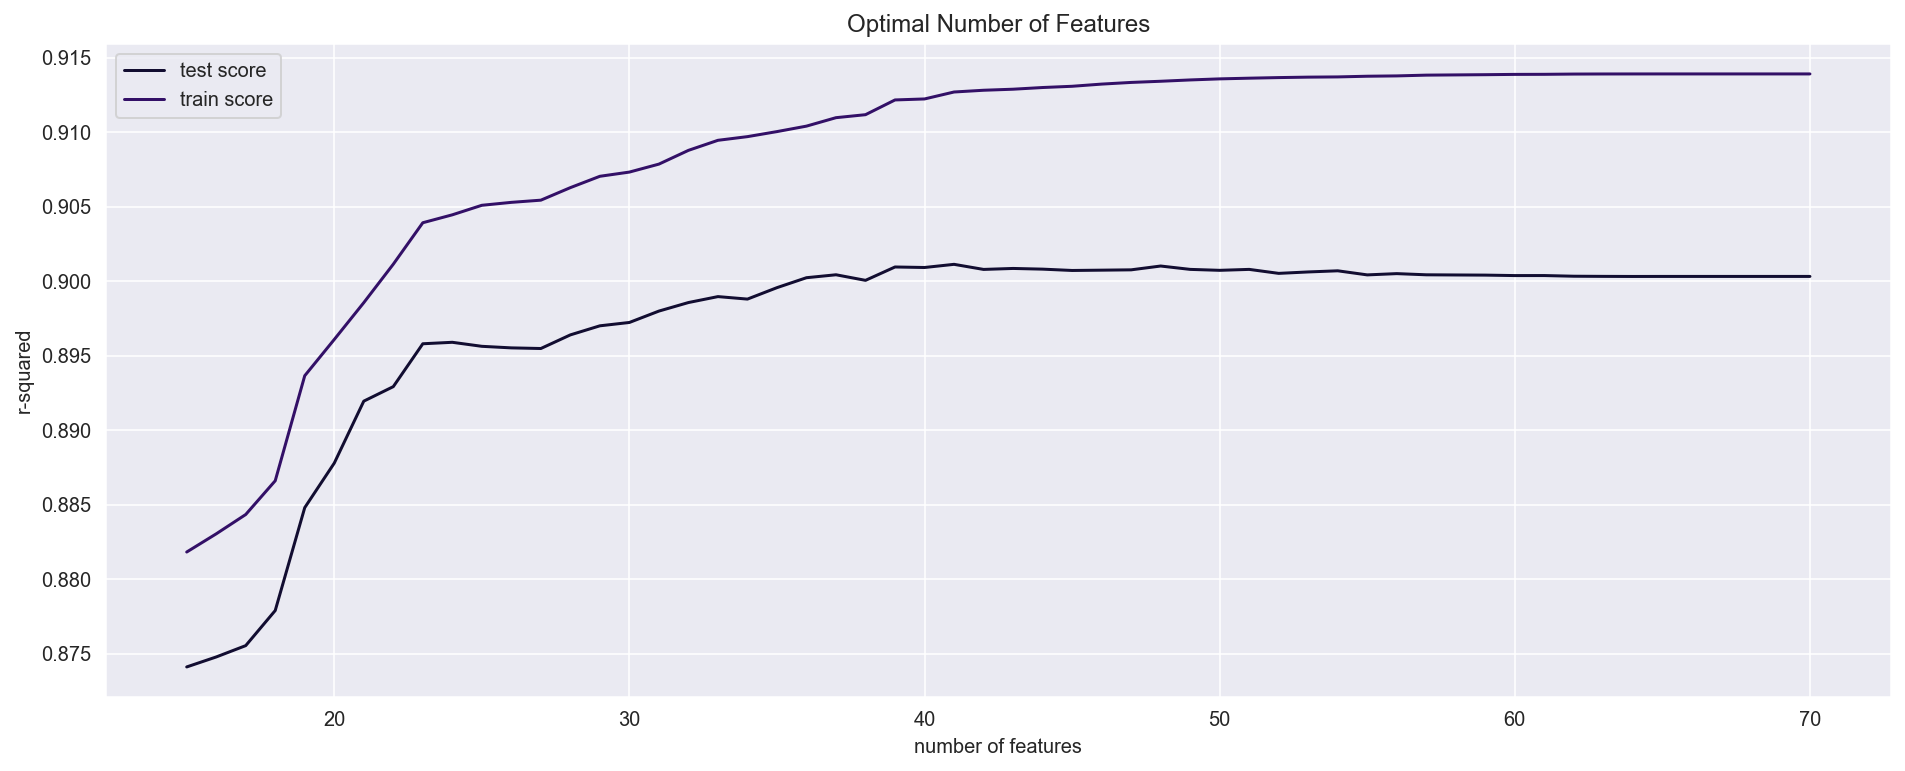

In [71]:
#Plotting the results

plt.figure(figsize=(16,6))

plt.plot(results_rfe[0]["param_n_features_to_select"], results_rfe[0]["mean_test_score"])
plt.plot(results_rfe[0]["param_n_features_to_select"], results_rfe[0]["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left');

#### Method 5: Tree based model for feature_importance

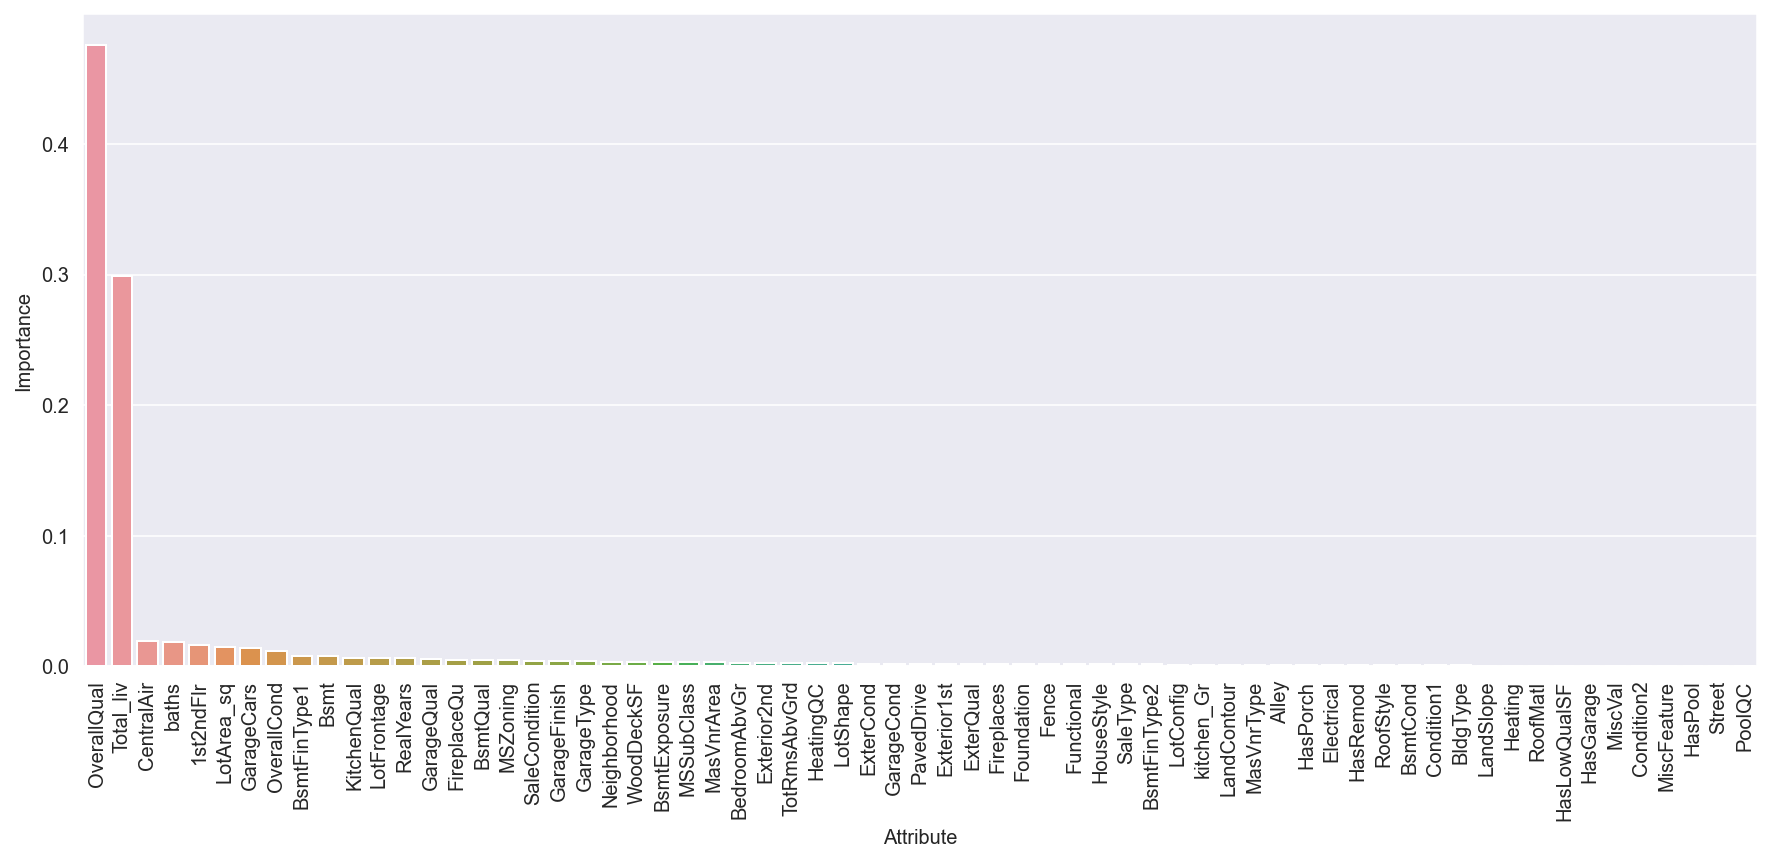

In [72]:
from sklearn.ensemble import RandomForestRegressor
selector=RandomForestRegressor(random_state=100)
selector.fit(data_train,target)
importance=pd.DataFrame(data={'Attribute': data_train.columns, 'Importance':selector.feature_importances_})
importance=importance.sort_values(by='Importance', ascending=False)

#Plotting
plt.subplots(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(x=importance['Attribute'],y=importance['Importance']);


#### Method 6: Selection via PCA - (PCA method only must be applied over numerical features)

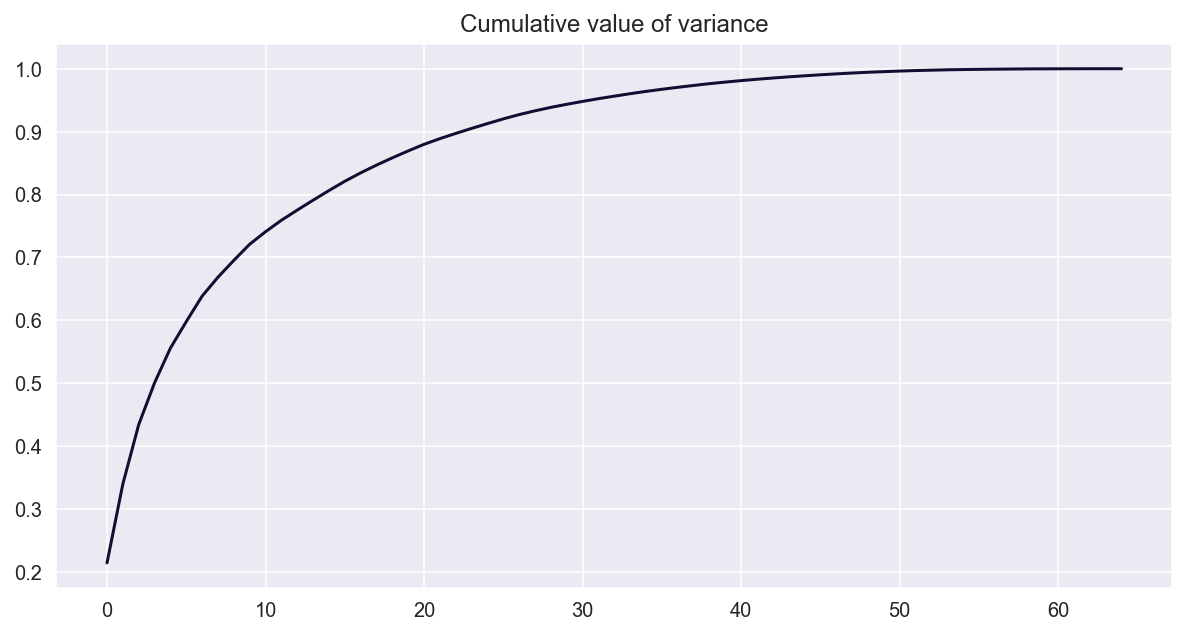

In [73]:
from sklearn.decomposition import PCA

pca=PCA(random_state=1)
pca.fit(data_train)

#Plotting
plt.subplots(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('Cumulative value of variance');

We see that 30 new independent variables can describe near the 95% of the problem variance. Let´s see the correlation of each feature with these new variables.

In [74]:
#Calculating the covariance values between old and new features: Loadings coefficients

loadings= pca.components_.T*np.sqrt(pca.explained_variance_)

#Plotting the matrix

S=pd.DataFrame(loadings, index=data_train.columns, columns=['PC'+str(i+1) for i in range (loadings.shape[0]) ])

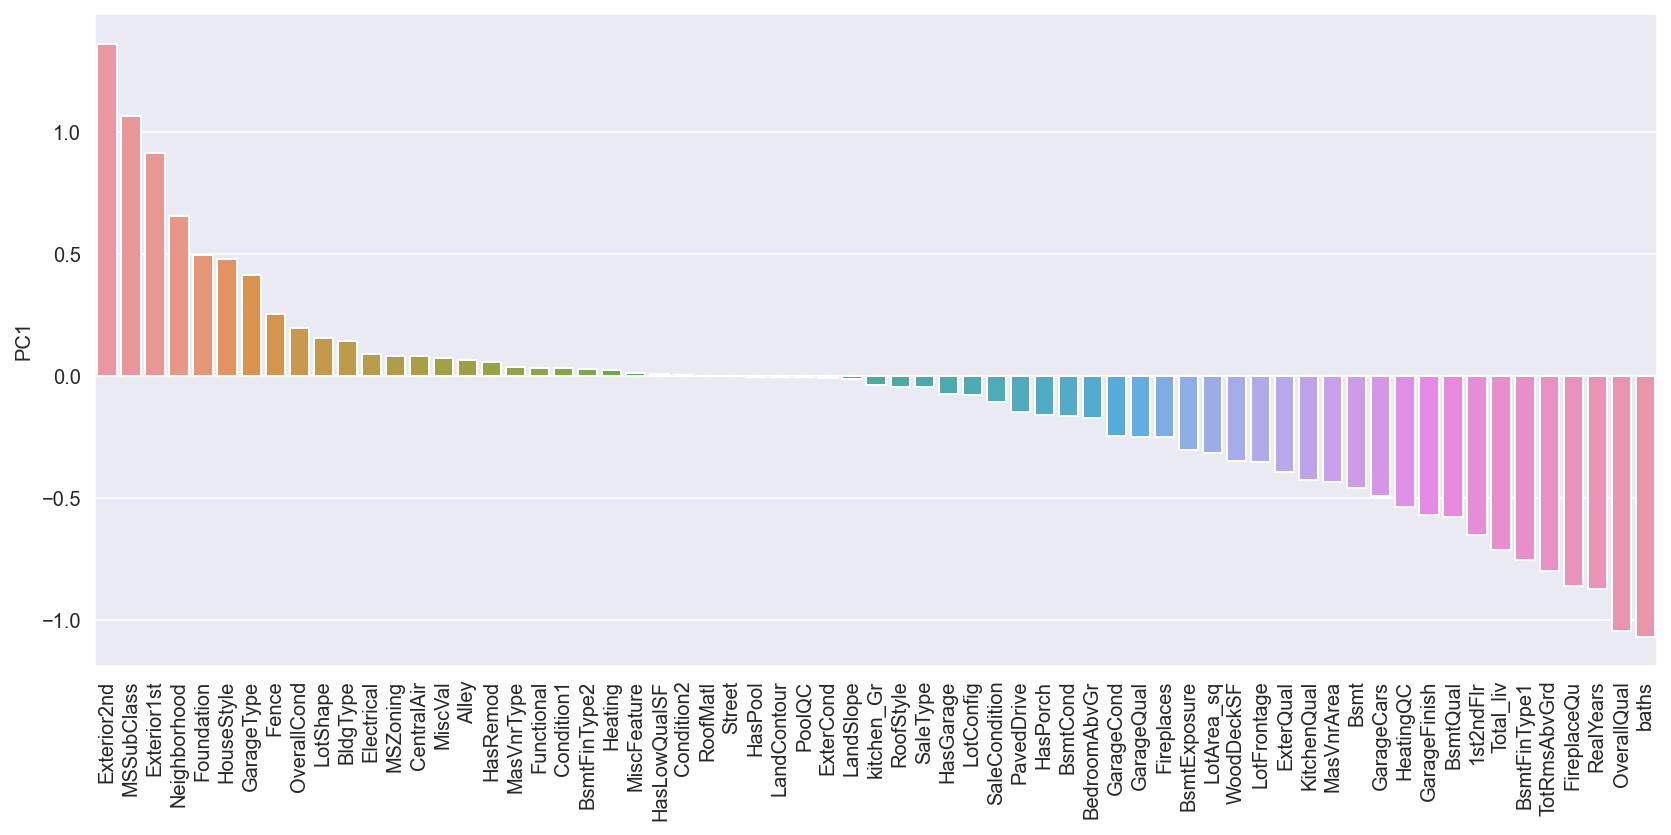

In [75]:
#The first five components are crucial because they explains the 50% of variance of the problem. 
#So take a look at the two first components.

PC1_importance=S['PC1'].sort_values(ascending=False)
plt.subplots(figsize=(14,6))
plt.xticks(rotation=90)
sns.barplot(x=PC1_importance.index, y=PC1_importance);

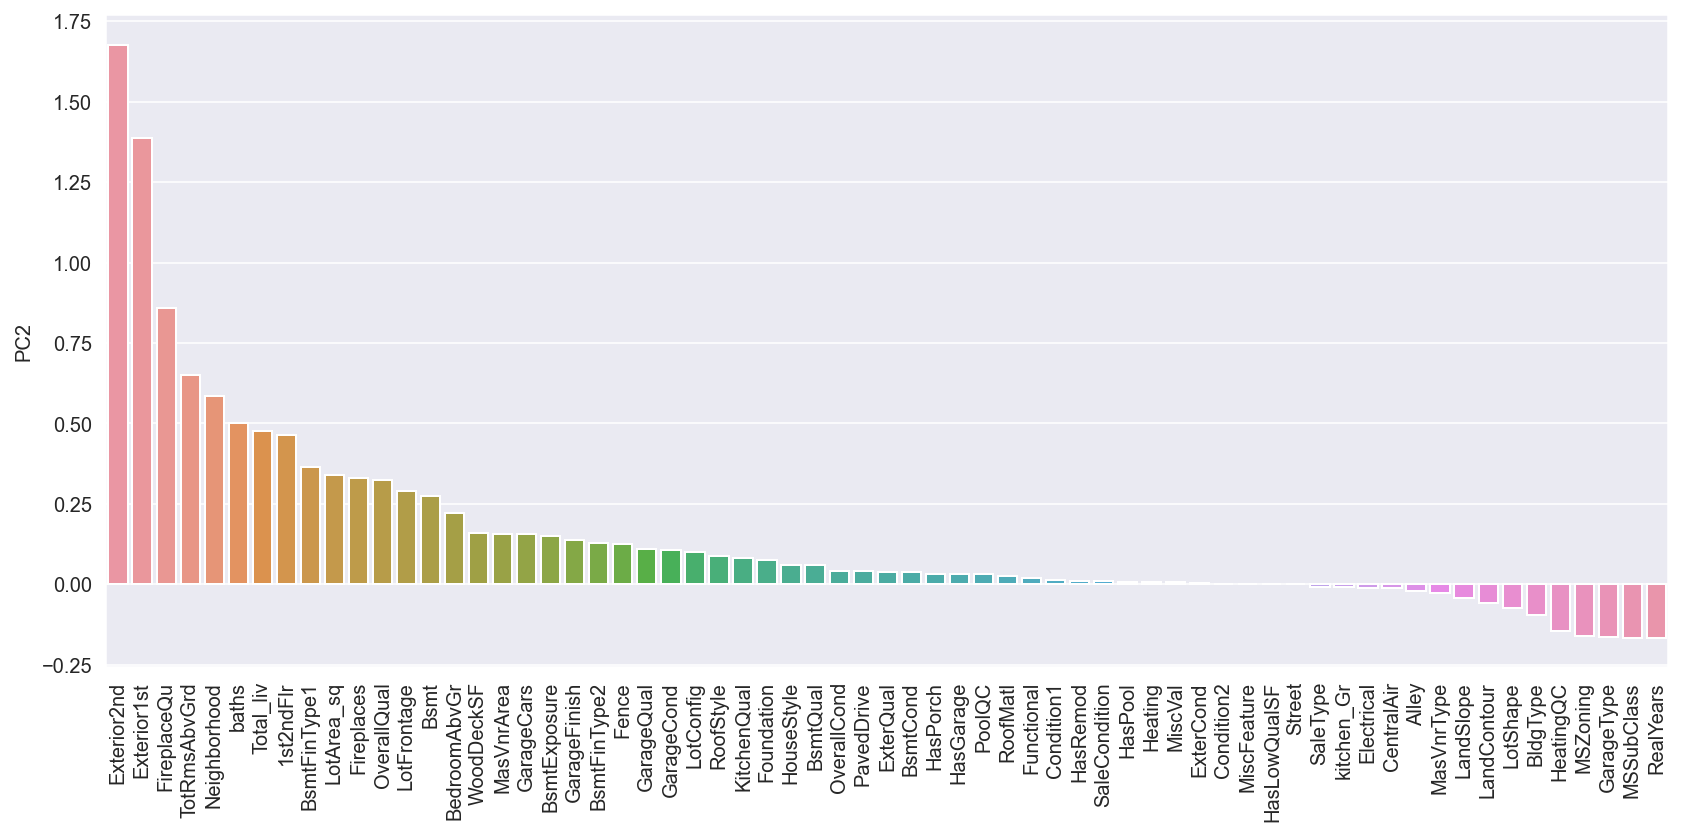

In [76]:
PC2_importance=S['PC2'].sort_values(ascending=False)
plt.subplots(figsize=(14,6))
plt.xticks(rotation=90)
sns.barplot(x=PC2_importance.index, y=PC2_importance);

We could also use one more method for PCA purposes: The Prince library. This library is for categorical data. As we have
already transformed our categorical data into numerical data, we cannot perform this method now. But it could be 
interesting to perform PCA with this method before imputing encoding to our categorical data.

In [100]:
#Prince library for PCA

from prince import FAMD
famd=FAMD(n_components=5, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42)
famd.fit(data_train)
famd.partial_row_coordinates(data_train)
famd.explained_inertia_

CONCLUSIONS OF PREPROCESSING AND ANALYSIS BEFORE TRAINING A MODEL:

       -The first thing we should consider is missing values.

       -It is not always convenient to drop outliers, except if it is an extreme outlier.

       -If the number of outliers is high, then RobustScaler is a very good alternative for scaling numerical variables;
        but for PCA methods we must use StandardScaler, since we try to maximice the variance, and if the variance is not           scaled between a range (1,-1) for all features, the algorithms will tend to select the features with a high                 variance as the most relevant ones.

       -Analyze the correlation between features (numerical and categorical) and also between features and target with             several methods.

       -Consider numerical features transformation, specially if we are thinking about developing parametric algorithms.

Train our model first with all features (except if the number of features is excesive), then compare with feature selection. In this exercise with a LinearRegression model as Baseline model we have obtained:

    With all features:                        R2: 0.8988360931644002 // RMSE mean in 5 Folds: 0.12664734562308974

    With Variance Threshold selection:        R2: 0.9003560693115388 // RMSE mean in 5 Folds: 0.12579587240112863

    With selectKBest (46 features):           R2: 0.8940190526630591 // RMSE mean in 5 folds: 0.1295824837259066 

    Seq. Feature Selection (63 features):     R2: 0.9008680448829269 // RMSE mean in 5 Folds: 0.1254839313150597

    Recursive Feature Elimination (41 feat.): R2: 0.901              // RMSE mean in 5 Folds: 0.125

FINAL FEATURE SELECTION FOR MODELING:

The best subset of features seems to be the one obtained with RFE, as we have a little improvement in R2 Score metric. So, we will consider the subset of 41 selected features by RFE for out modeling process for this exercise. Nevertheless, in a real scenario, we should develope several models, one with all features, another one with the selected features to compare results. We should have to make a trade-off between improvement in accuracy and computational resources needed. If there is no high improvement with all features with respect the model with less features, then we should probably prefer developing this last one, as we will need less resources. Nevertheless if the goal is to achieve the best results as possible (as in online competitions) then we perhaps prefer the model with all the features available.

The last transformation we should take into account it is to perform a one-hot encoding for nominal features instead of a label encoding, as we don´t want the model assumes that these features have an implicit order or importance. 

### FINAL SELECTED FEATURES:

In [35]:
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select=41, step=1)
selector = selector.fit(data_train, target)
selected_features=selector.get_feature_names_out()

#### ONE HOT ENCODING

In [36]:
#Number of nominal features in the final subset of selected features: Only two features as nominal.

nominals=[col for col in nominal if col in data_train[selected_features].columns]
nominals

['MasVnrType', 'Foundation']

In [37]:
#One Hot for nominal features

data_train[nominals]=data_train[nominals].astype('str')
train_onehot=pd.get_dummies(data_train[nominals], drop_first=True)
train_onehot.head()

#Combining One hot with the rest of features in Data train
data_train=data_train.drop(nominals, axis=1)
data_train=data_train.join(train_onehot)

,MasVnrType_2,MasVnrType_3,MasVnrType_4,Foundation_2,Foundation_3,Foundation_4,Foundation_5,Foundation_6
0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0


### MODELING

In [38]:
#This is a regression problem, and we will compare several methods.

#Importing all libraries needed

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import KFold, cross_val_score

import xgboost as xgb
import lightgbm as lgb

#### Defining Folds for Cross Validation

In [39]:
#We will use cross-validation: defining the folds
n_splits=5
kf=KFold(n_splits=5, shuffle=True, random_state=42).get_n_splits([data_train])

We could combine RandomSearchCV and GridSearchCV to optimize the models. But taking into account the computational resources and time required, we will use Bayesian Optimization package this time for tuning the hyperparameters.

#### Bayesian Optimization for tuning hyperparameters

In [133]:
#Defining the ranges

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials

params_Lasso      ={'type':'Lasso','alpha':hp.loguniform("alpha", np.log(0.0001), np.log(1.0))}
params_Ridge      ={'type':'Ridge','alpha':hp.loguniform("alpha", np.log(0.0001), np.log(15.0))}
params_Elastic    ={'type':'ElasticNet','alpha':hp.loguniform("alpha", np.log(0.0001), np.log(1.0)),
                           'l1_ratio':hp.uniform("l1_ratio", 0.001, 1.0)
                   }

params_SVR        ={'type':'SVR','C':hp.uniform("C", 0, 10.0),
                    'kernel':hp.choice('kernel',['poly','rbf','linear','sigmoid']), 
                    'degree':hp.choice('degree',range(2,10)), 
                    'gamma':hp.choice('gamma',['auto','scale']),
                    'coef0':hp.loguniform("coef0", np.log(0.0001), np.log(1.0))
                   }

params_RFR        ={'type':'RFR','n_estimators':hp.choice('n_estimators',np.arange(3000,5000,1,dtype=int)),
                    'max_features':hp.choice('max_features',['auto','sqrt','log2']),
                    'max_depth':hp.choice('max_depth',np.arange(2,20,1,dtype=int)),
                    'min_samples_split':hp.choice('min_samples_split',np.arange(2,40,1,dtype=int)),
                    'min_samples_leaf':hp.choice('min_samples_leaf',np.arange(2,40,1,dtype=int)),
                    'bootstrap':hp.choice('bootstrap',[True,False])
                   }

params_GBR        ={'type':'GBR','n_estimators':hp.choice('n_estimators',np.arange(100,5000,1,dtype=int)), 
                    'learning_rate':hp.loguniform("learning_rate", np.log(0.001), np.log(1.0)),                 
                    'max_depth':hp.choice('max_depth',np.arange(2,20,1,dtype=int)),
                    'max_features':hp.choice('max_features',['auto','log2','sqrt']),
                    'min_samples_leaf':hp.choice('min_samples_leaf',np.arange(2,40,1,dtype=int)), 
                    'min_samples_split':hp.choice('min_samples_split',np.arange(2,40,1,dtype=int)),           
                    'loss':hp.choice('loss',['ls', 'lad', 'huber', 'quantile'])
                   }

params_XGBoost    ={'type':'XGBoost','colsample_bytree':hp.uniform("colsample_bytree", 0.001, 1), 
                    'gamma':hp.uniform("gamma", 0.001, 1), 
                    'learning_rate':hp.loguniform("learning_rate", np.log(0.001), np.log(1.0)), 
                    'max_depth':hp.choice('max_depth',np.arange(2,20,1,dtype=int)), 
                    'min_child_weight':hp.uniform("min_child_weight", 0.001, 3), 
                    'n_estimators':hp.choice('n_estimators',np.arange(100,5000,1,dtype=int)),
                    'reg_alpha':hp.uniform("reg_alpha", 0.001, 1), 
                    'reg_lambda':hp.uniform("reg_lambda", 0.001, 1),
                    'subsample':hp.uniform("subsample", 0.001, 1)
                   }

params_Light      ={'type':'LightGBM',
                    'num_leaves':hp.choice('num_leaves',np.arange(2,20,1,dtype=int)),
                    'learning_rate':hp.loguniform("learning_rate", np.log(0.001), np.log(1.0)), 
                    'n_estimators' :hp.choice('n_estimators',np.arange(100,5000,1,dtype=int)),
                    'max_bin' :hp.choice('max_bin',np.arange(10,100,1,dtype=int)), 
                    'bagging_fraction' : hp.quniform("bagging_fraction", 0.01, 1, 0.001),
                    'bagging_freq' : hp.choice('bagging_freq',np.arange(10,100,1,dtype=int)), 
                    'feature_fraction' : hp.choice("feature_fraction", np.arange(0.1,1,0.05)),
                    'min_data_in_leaf' :hp.choice('min_data_in_leaf',np.arange(2,40,1,dtype=int)), 
                    'min_sum_hessian_in_leaf' : hp.choice('min_sum_hessian_in_leaf',np.arange(2,40,1,dtype=int))
                   }


search_space      =[params_Lasso, params_Ridge,params_Elastic,params_SVR,params_RFR,params_GBR,
                    params_XGBoost, params_Light
                   ]

results=[]

def score_function(params):
    score=0.0
    global t
    t=params['type']
    del params['type']
    if t=='Lasso':
        model=Lasso(**params,random_state=1)
    elif t=='Ridge':
        model=Ridge(**params,random_state=2)
    elif t=='ElasticNet':
        model=ElasticNet(**params,random_state=3)
    elif t=='SVR':
        model=SVR(**params)
    elif t=='RFR':
        model=RandomForestRegressor(**params,random_state=5)
    elif t=='GBR':
        model=GradientBoostingRegressor(**params,random_state=6)
    elif t=='XGBoost':
        model=xgb.XGBRegressor(**params,random_state=7) 
    elif t=='LightGBM':
        model=lgb.LGBMRegressor(**params,objective='regression',bagging_seed=8,feature_fraction_seed=8)
    
    score = cross_val_score(model, data_train, target, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1).mean()
    
    return {'loss':np.sqrt(-score),'status':STATUS_OK}


for K in range(len(search_space)):
    trials= Trials()
    best=fmin(score_function,space=search_space[K],algo=tpe.suggest,max_evals=30, trials=trials)
    results.append([t, best, np.min(trials.losses())])
results


100%|██████████| 30/30 [03:14<00:00,  6.49s/trial, best loss: 0.11649015935814992]


[['Lasso', {'alpha': 0.000853152429406757}, 0.12428361192873341],
 ['Ridge', {'alpha': 14.879373429095697}, 0.12443778212171146],
 ['ElasticNet',
  {'alpha': 0.014260400635675057, 'l1_ratio': 0.02343764161146252},
  0.12447114381401123],
 ['SVR',
  {'C': 2.075297147406651,
   'coef0': 0.6857020110332371,
   'degree': 0,
   'gamma': 1,
   'kernel': 1},
  0.12021566661711726],
 ['RFR',
  {'bootstrap': 0,
   'max_depth': 15,
   'max_features': 0,
   'min_samples_leaf': 3,
   'min_samples_split': 2,
   'n_estimators': 1916},
  0.14028736045812576],
 ['GBR',
  {'learning_rate': 0.023080095259420026,
   'loss': 2,
   'max_depth': 3,
   'max_features': 2,
   'min_samples_leaf': 16,
   'min_samples_split': 34,
   'n_estimators': 4501},
  0.11519693741183276],
 ['XGBoost',
  {'colsample_bytree': 0.48412709463179404,
   'gamma': 0.0029895992002004906,
   'learning_rate': 0.07810487218620299,
   'max_depth': 2,
   'min_child_weight': 2.3431868348177876,
   'n_estimators': 1116,
   'reg_alpha': 0.

#### Best models

In [44]:

models_names     =['Lasso','Ridge','ElasticNet','LinearSVR','RFR','GBR','XGBoost', 'LightGBM']

final_models     =[ Lasso(alpha= 0.000853152429406757, random_state=1),
                   
                    Ridge(alpha= 14.879373429095697, random_state=2),
                   
                    ElasticNet(alpha= 0.014260400635675057, l1_ratio= 0.02343764161146252, random_state=3),
                   
                    SVR(C= 2.075297147406651, coef0= 0.6857020110332371, degree= 2, gamma= 'scale', kernel= 'rbf'),
                   
                    RandomForestRegressor(bootstrap= True, max_depth= 15, max_features= 'auto', min_samples_leaf= 3,
                                          min_samples_split= 2, n_estimators= 1916, random_state=5),
                   
                    GradientBoostingRegressor(learning_rate= 0.023080095259420026, loss= 'huber', max_depth= 3,
                                              max_features= 2, min_samples_leaf= 16, min_samples_split= 34,
                                              n_estimators= 4501, random_state=6),
                   
                    xgb.XGBRegressor(colsample_bytree= 0.48412709463179404, gamma= 0.0029895992002004906,
                                     learning_rate= 0.07810487218620299, max_depth= 2,
                                     min_child_weight= 2.3431868348177876, n_estimators= 1116,
                                     reg_alpha= 0.4291788873197072, reg_lambda= 0.32121884557921443,
                                     subsample= 0.7151484414829512, random_state=7),
                   
                    lgb.LGBMRegressor(bagging_fraction= 0.911, bagging_freq= 23, feature_fraction= 0.25,
                                      learning_rate= 0.002075145537302627, max_bin= 19, min_data_in_leaf= 11,
                                      min_sum_hessian_in_leaf= 0, n_estimators= 4212, num_leaves= 16,
                                      objective='regression',bagging_seed=8,feature_fraction_seed=8, verbose=-1)
                  ]


#### EMSEMBLING MODELS

Now we will compare the individual results of each model, with emsemble models. First we will combine the three best models above to see if we get some improvement.

#### Average of several models

In [45]:
#Averaging the results of the better models (with the same weight for all of them).

from sklearn.ensemble import VotingRegressor

select_models=[(models_names[5],final_models[5]),
               (models_names[6],final_models[6]),
               (models_names[7],final_models[7])
               ]

#Voting Regressor makes a clone of the original passed models, and fit those models on the X_train entire data
#returning the average prediction (with or without taking into account weights)

vot_reg=VotingRegressor(select_models, weights=None)

RMSE_test= np.sqrt(-cross_val_score(vot_reg, data_train, target, scoring="neg_mean_squared_error", cv = kf))
RMSE_test.mean()

[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0
[LightGBM] [Warning] bagging_fraction is set=0.911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.911
[LightGBM] [Warning] bagging_freq is set=23, subsample_freq=0 will be ignored. Current value: bagging_freq=23
[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0
[

0.11394193945254334

#### Stacking with a metamodel

We have obtained a better performance with the ensemble model (with the same weight or importance for each them). Now, we will use a metamodel for re-train the best models above. We obtain a small improvement:

In [46]:
#Now, Stacking several models with a meta-model. With this option, we are using the predicting outputs of the models as inputs 
#for a second level prediction in a meta-model. 

from sklearn.ensemble import StackingRegressor

estimators=[(models_names[5],final_models[5]),
            (models_names[6],final_models[6]),
            (models_names[7],final_models[7])
            ]

final_estimator=final_models[0]

stack_reg=StackingRegressor(estimators=estimators,final_estimator=final_estimator,cv=kf,n_jobs=-1,verbose=0)

RMSE_test= np.sqrt(-cross_val_score(stack_reg, data_train, target, scoring="neg_mean_squared_error", cv = kf))
RMSE_test.mean()



0.11370696076134182

#### Train set error of each ensembled model

Now we will compare the fitness of each option with the entire train dataset.

In [47]:
#First, let´s go to verify the behaviour with the entire X_train data of each model.
from sklearn.metrics import mean_squared_error

#Error value
def RMSE_f(y,y_pred):
     return np.sqrt(mean_squared_error(y,y_pred))


#First model: Stacking with meta-model

stack_reg.fit(data_train,target)
stack_reg_pred=stack_reg.predict(data_train)
print(RMSE_f(target,stack_reg_pred))



StackingRegressor(cv=5,
                  estimators=[('GBR',
                               GradientBoostingRegressor(learning_rate=0.023080095259420026,
                                                         loss='huber',
                                                         max_features=2,
                                                         min_samples_leaf=16,
                                                         min_samples_split=34,
                                                         n_estimators=4501,
                                                         random_state=6)),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.48412709463179404,
                                            gamma=0....
   

0.07359999917815956


In [48]:
#Second XGBoost
XGBmodel=final_models[6]
XGBmodel.fit(data_train,target)
XGB_pred=XGBmodel.predict(data_train)
print(RMSE_f(target,XGB_pred))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.48412709463179404,
             gamma=0.0029895992002004906, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.07810487218620299,
             max_delta_step=0, max_depth=2, min_child_weight=2.3431868348177876,
             missing=nan, monotone_constraints='()', n_estimators=1116,
             n_jobs=8, num_parallel_tree=1, random_state=7,
             reg_alpha=0.4291788873197072, reg_lambda=0.32121884557921443,
             scale_pos_weight=1, subsample=0.7151484414829512,
             tree_method='exact', validate_parameters=1, verbosity=None)

0.0737996606575195


In [49]:
#Third LightGBM
Lightmodel=final_models[7]
Lightmodel.fit(data_train,target)
Light_pred=Lightmodel.predict(data_train)
print(RMSE_f(target,Light_pred))

[LightGBM] [Warning] feature_fraction is set=0.25, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.25
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0
[LightGBM] [Warning] bagging_fraction is set=0.911, subsample=1.0 will be ignored. Current value: bagging_fraction=0.911
[LightGBM] [Warning] bagging_freq is set=23, subsample_freq=0 will be ignored. Current value: bagging_freq=23


LGBMRegressor(bagging_fraction=0.911, bagging_freq=23, bagging_seed=8,
              feature_fraction=0.25, feature_fraction_seed=8,
              learning_rate=0.002075145537302627, max_bin=19,
              min_data_in_leaf=11, min_sum_hessian_in_leaf=0, n_estimators=4212,
              num_leaves=16, objective='regression', verbose=-1)

0.0763045559741967


In [50]:
#Fourth: GBR
GBRmodel=final_models[5]
GBRmodel.fit(data_train,target)
GBRmodel_pred=GBRmodel.predict(data_train)
print(RMSE_f(target,GBRmodel_pred))

GradientBoostingRegressor(learning_rate=0.023080095259420026, loss='huber',
                          max_features=2, min_samples_leaf=16,
                          min_samples_split=34, n_estimators=4501,
                          random_state=6)

0.07839116075897695


**SUMMARIZING:**

    GBR_best_test_loss:       0.11519693741183276   -  Train_loss: 0.07839116075897695  - Overfitting: 0.03680578

    XGBoost_best_test_loss:   0.11611522452928157   -  Train_loss: 0.0737996606575195   - Overfitting: 0.04231556

    LightGBM_best_test_loss:  0.11649015935814992   -  Train_loss: 0.0763045559741967   - Overfitting: 0.0401856

    Stacking_model_test_loss: 0.11370696076134182   -  Train_loss: 0.07359999917815956  - Overfitting: 0.04010696


It seems that GBR is our best model, even better than stacked one. Let´s try another option; we will stack XGBoost and GBR but with different weights.

#### FINAL SELECTED MODELS FOR STACKING

In [58]:
#We try first two random weights for them:

select_models=[('GBR',GBRmodel),('XGB',XGBmodel)]
final_vot_reg=VotingRegressor(select_models, weights=[0.70, 0.40])

#Test Error
RMSE_test= np.sqrt(-cross_val_score(final_vot_reg, data_train, target, scoring="neg_mean_squared_error", 
                                    cv = kf, verbose=0))
print('Test error:{}'.format(RMSE_test.mean()))

#Train Error
final_vot_reg.fit(data_train,target)
final_pred=final_vot_reg.predict(data_train)
print('Train error:{}'.format(RMSE_f(target,final_pred)))

print('Overfitting:{}'.format(RMSE_test.mean()-RMSE_f(target,final_pred)))

Test error:0.11407039362837193


VotingRegressor(estimators=[('GBR',
                             GradientBoostingRegressor(learning_rate=0.023080095259420026,
                                                       loss='huber',
                                                       max_features=2,
                                                       min_samples_leaf=16,
                                                       min_samples_split=34,
                                                       n_estimators=4501,
                                                       random_state=6)),
                            ('XGB',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.48412709463179404,
                                          gamma=0.00298959920020...
                                          max_de

Train error:0.07507936437717694
Overfitting:0.03899102925119499


#### BAYESIAN OPTIMIZATION FOR FINDING THE BEST WEIGHTS OF STACKED MODELS

In [60]:
#We can use Hyperopt optimization for solving the best coefficients.
#We have a function like this: A*GBM+B*XGBmodel+C

from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
Df=pd.DataFrame(data={'GBM_pred': GBRmodel_pred, 'XGB_pred':XGB_pred})

search_space_2=[hp.uniform('x', 0.0, 1),
                hp.uniform('y', 0.0, 1),
                hp.uniform('b', 0.0, 1)]
                
trials_2=Trials()

def loss_function(args): 
    
    x,y,b = args
    score=(1/(2*Df.shape[0]))*np.sum(((x*Df.iloc[:,0]+y*Df.iloc[:,1]+b)-target)**2)
  
    return {'loss':np.sqrt(score),'status':STATUS_OK}

best_2=fmin(fn=loss_function,space=search_space_2,algo=tpe.suggest,max_evals=30, trials=trials_2,
            rstate=np.random.RandomState(42))
best_2

100%|██████████| 30/30 [00:00<00:00, 221.45trial/s, best loss: 0.189173847896522]  


{'b': 0.4193798789925088, 'x': 0.5898653189726123, 'y': 0.3538132142045131}

Conclusions: Depending the level of accuracy we should get for our model, we could try more models or more feature engineering options for reducing the train and test errors. But, as this exercise is only for demonstrative purposes, we will assume that the final model ensembled is good enough.

### FINAL ENSEMBLE

In [61]:
#Final ensemble: ensemble=0.5898*GBM+0.3538*XGBmodel+0.4193

test_pred=0.5898*GBRmodel.predict(data_train)+0.3538*XGBmodel.predict(data_train)+0.4193

#Train error

mean_squared_error(target,test_pred)


0.07209912004789758

### REVERT LOG TRANSFORMATION OVER TARGET

In [ ]:
#Before sending submission, we have to revert the transformation over target prediction:

final_test_pred=np.exp(test_pred)

#Submission
sub=pd.DataFrame()
sub['Id']=X_test_ID
sub['SalePrice']=final_test_pred
sub.to_csv('submission.csv',index=False)